# Telecom Churn Case Study

In [2]:
# importing all the necessary libraries 
import numpy as np , pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV,cross_val_score,KFold
from sklearn.decomposition import PCA,IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,confusion_matrix,recall_score,roc_auc_score,roc_curve,classification_report
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [3]:
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
pd.set_option('display.max_columns',150)
pd.options.display.float_format = '{:,.2f}'.format


In [5]:
# reading the dataset 
telecom = pd.read_csv('telecom_churn_data.csv',encoding = 'ISO-8859-1')
# dimensions of the dataset
telecom.shape

(99999, 226)

In [6]:
# displaying the head of the data
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,...,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,...,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.00,1.00,1.00,nan,252.00,252.00,252.00,nan,0.00,0.00,0.00,nan,1.00,1.00,1.00,nan,252.00,252.00,252.00,nan,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,nan,212.17,212.17,212.17,nan,0.00,0.00,0.00,nan,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,...,8/28/2014,9/30/2014,44,23,30,0,NaN,7/25/2014,8/10/2014,NaN,nan,1.00,2.00,nan,nan,154.00,25.00,nan,nan,1.00,2.00,nan,nan,0.00,0.00,nan,nan,154.00,50.00,nan,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,nan,nan,28.61,7.60,nan,nan,0.00,0.00,nan,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.6

In [7]:
telecom.set_index('mobile_number',inplace=True)

In [8]:
# summary of the dataset
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 7000842753 to 7001905007
Data columns (total 225 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   circle_id                 int64  
 1   loc_og_t2o_mou            float64
 2   std_og_t2o_mou            float64
 3   loc_ic_t2o_mou            float64
 4   last_date_of_month_6      object 
 5   last_date_of_month_7      object 
 6   last_date_of_month_8      object 
 7   last_date_of_month_9      object 
 8   arpu_6                    float64
 9   arpu_7                    float64
 10  arpu_8                    float64
 11  arpu_9                    float64
 12  onnet_mou_6               float64
 13  onnet_mou_7               float64
 14  onnet_mou_8               float64
 15  onnet_mou_9               float64
 16  offnet_mou_6              float64
 17  offnet_mou_7              float64
 18  offnet_mou_8              float64
 19  offnet_mou_9              float64
 20  roam_ic_mou_6

from above we can see that there are some misclassification of data types like total_rech_data_ it should be int type instead of float and date columns are not encoded correctly , hence perform type conversion

In [9]:
# displaying the percentage of missing values in a column
null_percentage = ((telecom.isnull().sum()/len(telecom)) * 100).sort_values(ascending=False)
null_percentage

count_rech_2g_6            74.85
arpu_2g_6                  74.85
max_rech_data_6            74.85
date_of_last_rech_data_6   74.85
av_rech_amt_data_6         74.85
                            ... 
last_day_rch_amt_6          0.00
last_day_rch_amt_7          0.00
last_day_rch_amt_8          0.00
last_day_rch_amt_9          0.00
circle_id                   0.00
Length: 225, dtype: float64

we can see from above that there are alot of missing values in the dataset so we need to handle them 

### Data CLeaning 

In [10]:
# columns which have null vales > 70
null_columns = telecom.loc[:,list((telecom.isnull().sum()/len(telecom) > 0.70).values)] 
null_columns

,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,6/21/2014,7/16/2014,8/8/2014,NaN,1.00,1.00,1.00,nan,252.00,252.00,252.00,nan,0.00,0.00,0.00,nan,1.00,1.00,1.00,nan,252.00,252.00,252.00,nan,212.17,212.17,212.17,nan,212.17,212.17,212.17,nan,0.00,0.00,0.00,nan,1.00,1.00,1.00,nan
7001865778,NaN,7/25/2014,8/10/2014,NaN,nan,1.00,2.00,nan,nan,154.00,25.00,nan,nan,1.00,2.00,nan,nan,0.00,0.00,nan,nan,154.00,50.00,nan,nan,0.00,0.00,nan,nan,28.61,7.60,nan,nan,0.00,0.00,nan,nan,1.00,1.00,nan
7001625959,NaN,NaN,NaN,9/17/2014,nan,nan,nan,1.00,nan,nan,nan,46.00,nan,nan,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,46.00,nan,nan,nan,2.84,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,1.00
7001204172,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7000142493,6/4/2014,NaN,NaN,NaN,1.00,nan,nan,nan,56.00,nan,nan,nan,1.00,nan,nan,nan,0.00,nan,nan,nan,56.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7001548952,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7000607688,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7000087541,6/13/2014,NaN,NaN,NaN,2.00,nan,nan,nan,25.00,nan,nan,nan,2.00,nan,nan,nan,0.00,nan,nan,nan,39.00,nan,nan,nan,141.48,nan,nan,nan,2.40,nan,nan,nan,0.00,nan,nan,nan,1.00,nan,nan,nan


from above we can see that there are abovw e 70% are missing values and these columns are not useful for the analysis , Hence frop columns 


In [11]:
# these columns are used for deriving the new features hence we can keep these columns 
#null_columns = null_columns.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
 #                 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis=1)

In [12]:
# dropping columns where 
drop_null_cols = list(null_columns.columns)
telecom = telecom.drop(drop_null_cols,axis=1)
telecom.head()

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,...,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,...,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,...,0.00,0.00,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00
7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.

In [13]:
# missing values row wise
((telecom.isna().sum(axis=1)/ len(telecom.columns)) * 100).sort_values(ascending=False)


mobile_number
7000100023   68.11
7002382730   68.11
7000085177   68.11
7001830044   68.11
7001347105   68.11
              ... 
7000977992    0.00
7002031796    0.00
7002240486    0.00
7000511699    0.00
7001906552    0.00
Length: 99999, dtype: float64

In [14]:
# these are the rows which are having more than 50 % data were missing so we can impute these rows as zero 
fill_na_rows = telecom.loc[(telecom.isnull().sum(axis=1)/len(telecom.columns) > 0.50).values,:]
telecom.loc[(telecom.isnull().sum(axis=1)/len(telecom.columns) > 0.50).values,:] = fill_na_rows.fillna(0)
telecom

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,...,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,...,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,...,0.00,0.00,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00
7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.

In [15]:
telecom[telecom.index == 7002074629]

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,...,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7002074629,109,0.00,0.00,0.00,6/30/2014,0,8/31/2014,0,8.44,0.00,80.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,1,0,0,0,94,0,0,0,94,0,0,0,8/8/2014,0,0,0,94,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,492,0.00,0.00,0.00,0.00


In [16]:
telecom.nunique().values

array([    1,     1,     1,     1,     1,     2,     2,     2, 85681,
       85308, 83615, 79937, 24313, 24336, 24089, 23565, 31140, 31023,
       30908, 30077,  6512,  5230,  5315,  4827,  8038,  6639,  6504,
        5882, 13539, 13411, 13336, 12949, 20905, 20637, 20544, 20141,
        3860,  3863,  3807,  3758,  2235,  2426,  2516,  2332, 26372,
       26091, 25990, 25376, 18244, 18567, 18291, 17934, 19734, 20018,
       19786, 19052,  2450,  2391,  2333,  2295,     1,     1,     1,
           1, 27502, 27951, 27491, 26553,  1381,  1380,  1276,  1255,
        3965,  4396,  4390,  4095,  1018,   187,   216,   235, 40327,
       40477, 40074, 39160, 13540, 13511, 13346, 12993, 22065, 21918,
       21886, 21484,  7250,  7395,  7097,  7091, 28569, 28390, 28200,
       27697,  6279,  6481,  6352,  6157,  9308,  9464,  9304,  8933,
        3125,  3209,  3051,  3090,     1,     1,     1,     1, 11646,
       11889, 11662, 11266, 32247, 32242, 32128, 31260,    84,   107,
         102,   384,

In [17]:
# selecting the columns which having only one unique values 
one_unique_cols = telecom.loc[:,list((telecom.nunique() == 1).values)].head()
one_unique_cols.head()
 

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
mobile_number,,,,,,,,,,,,,
7000842753,109,0.00,0.00,0.00,6/30/2014,nan,nan,0.00,nan,nan,nan,0.00,nan
7001865778,109,0.00,0.00,0.00,6/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7001625959,109,0.00,0.00,0.00,6/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7001204172,109,0.00,0.00,0.00,6/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7000142493,109,0.00,0.00,0.00,6/30/2014,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [18]:
# dropping the columns which having only one unique column
drop_cols = one_unique_cols.columns 
telecom = telecom.drop(drop_cols,axis=1)
telecom.head()

,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,...,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,7/31/2014,8/31/2014,9/30/2014,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,...,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
7001865778,7/31/2014,8/31/2014,9/30/2014,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,0.00,0.00,40.31,178.53,312.44,72.11,...,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,6/29/2014,7/31/2014,8/28/2014,9/30/2014,44,23,30,0,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00
7001625959,7/31/2014,8/31/2014,9/30/2014,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22

In [19]:
# dropping columns that contains date in it since we dont require date column for our analysis
date_cols = telecom.select_dtypes(include='object').columns
telecom = telecom.drop(date_cols,axis=1)
telecom.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,...,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
7001865778,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,0.00,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,...,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00
7001625959,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.00,47.64,10

In [20]:
telecom.nunique().values

array([85681, 85308, 83615, 79937, 24313, 24336, 24089, 23565, 31140,
       31023, 30908, 30077,  6512,  5230,  5315,  4827,  8038,  6639,
        6504,  5882, 13539, 13411, 13336, 12949, 20905, 20637, 20544,
       20141,  3860,  3863,  3807,  3758,  2235,  2426,  2516,  2332,
       26372, 26091, 25990, 25376, 18244, 18567, 18291, 17934, 19734,
       20018, 19786, 19052,  2450,  2391,  2333,  2295, 27502, 27951,
       27491, 26553,  1381,  1380,  1276,  1255,  3965,  4396,  4390,
        4095,  1018,   187,   216,   235, 40327, 40477, 40074, 39160,
       13540, 13511, 13346, 12993, 22065, 21918, 21886, 21484,  7250,
        7395,  7097,  7091, 28569, 28390, 28200, 27697,  6279,  6481,
        6352,  6157,  9308,  9464,  9304,  8933,  3125,  3209,  3051,
        3090, 11646, 11889, 11662, 11266, 32247, 32242, 32128, 31260,
          84,   107,   102,   384,  5521,  5789,  5844,  5557,  1817,
        2002,  1896,  1923,   102,   101,    96,    97,  2305,  2329,
        2347,  2304,

In [21]:
# displaying the integer columns and selecting the caregorical variables because categorical variables will be discrete in nature 

telecom.select_dtypes(include='int64').nunique()

total_rech_num_6       102
total_rech_num_7       101
total_rech_num_8        96
total_rech_num_9        97
total_rech_amt_6      2305
total_rech_amt_7      2329
total_rech_amt_8      2347
total_rech_amt_9      2304
max_rech_amt_6         202
max_rech_amt_7         183
max_rech_amt_8         213
max_rech_amt_9         201
last_day_rch_amt_6     186
last_day_rch_amt_7     173
last_day_rch_amt_8     199
last_day_rch_amt_9     185
monthly_2g_6             5
monthly_2g_7             6
monthly_2g_8             6
monthly_2g_9             5
sachet_2g_6             32
sachet_2g_7             35
sachet_2g_8             34
sachet_2g_9             32
monthly_3g_6            12
monthly_3g_7            15
monthly_3g_8            12
monthly_3g_9            11
sachet_3g_6             25
sachet_3g_7             27
sachet_3g_8             29
sachet_3g_9             27
aon                   3489
dtype: int64

from above we can see that columns that contains amount,are considered as continuous variable while the other columns are having discrete values like number of recharges, so by looking at the unique value count we can make a threshold aroung 105 to suggregate the columns into categorical and continuos for better insights 

In [22]:
telecom.select_dtypes(include='float64').nunique().sort_values().head(10)

spl_ic_mou_6      84
spl_ic_mou_8     102
spl_ic_mou_7     107
og_others_7      187
og_others_8      216
og_others_9      235
spl_ic_mou_9     384
og_others_6     1018
isd_og_mou_9    1255
isd_og_mou_8    1276
dtype: int64

In [23]:
categorical = []
continuous = []
for i in telecom.select_dtypes(include='int64').columns:
    if ( telecom[i].nunique() < 105 ):
        categorical.append(i)
    else:
        continuous.append(i)
print(len(categorical))
print(len(continuous))


20
13


In [24]:
cont_cols = telecom.select_dtypes(include='float64').columns
for col in cont_cols:
    continuous.append(col)
print(len(continuous))

145


In [25]:
telecom_category = telecom[categorical]
telecom_category.head()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9
mobile_number,,,,,,,,,,,,,,,,,,,,
7000842753,4,3,2,6,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
7001865778,4,9,11,5,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0
7001625959,5,4,2,7,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
7001204172,10,11,18,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7000142493,5,6,3,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [26]:
telecom_continuos = telecom[continuous]
telecom_continuos.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,aon,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,362,252,252,0,252,252,252,0,252,252,252,0,968,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,30.40,0.00,101.20,3.58
7001865778,74,384,283,121,44,154,65,50,44,23,30,0,1006,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,0.00,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7001625959,168,315,116,358,86,200,86,100,0,200,86,0,1103,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,

#### Imputing the missing values 

In [27]:
# imputing the missing values for categorical variables with mode
telecom_category.mode()
telecom_category.isna().sum()

total_rech_num_6    0
total_rech_num_7    0
total_rech_num_8    0
total_rech_num_9    0
monthly_2g_6        0
monthly_2g_7        0
monthly_2g_8        0
monthly_2g_9        0
sachet_2g_6         0
sachet_2g_7         0
sachet_2g_8         0
sachet_2g_9         0
monthly_3g_6        0
monthly_3g_7        0
monthly_3g_8        0
monthly_3g_9        0
sachet_3g_6         0
sachet_3g_7         0
sachet_3g_8         0
sachet_3g_9         0
dtype: int64

we can see that there are no missing values in the categorical variables 

In [28]:
pd.DataFrame(telecom_continuos.isna().sum()).T

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,aon,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,0,0,0,0,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,0,0,0,0,2917,2577,4096,6462,2917,2577,4096,6462,2917,2577,4096,6462,0,0,0,0,0,0,0,0,0,0,0,0


there are plenty of missing values in the continuous variables , hence we impute them with the median value 

In [29]:
pd.DataFrame(telecom_continuos.median()).T

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,aon,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,230.00,220.00,225.00,200.00,110.00,110.00,98.00,61.00,30.00,30.00,30.00,0.00,863.00,197.70,191.64,192.08,176.85,33.42,31.27,31.33,28.79,94.48,89.48,89.91,84.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.56,11.18,11.33,10.83,40.21,39.34,39.29,38.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.78,62.03,62.06,60.11,0.00,0.00,0.00,0.00,3.66,3.26,2.98,2.18,0.00,0.00,0.00,0.00,10.92,10.23,9.58,7.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,145.14,141.53,138.61,125.46,15.31,15.21,15.51,15.19,55.41,55.73,56.89,55.24,0.83,0.85,0.86,0.90,90.49,90.54,91.69,89.53,0.00,0.00,0.00,0.00,1.91,1.88,1.88,1.60,0.00,0.00,0.00,0.00,5.66,5.63,5.58,5.06,114.74,116.34,114.66,105.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [30]:
telecom_continuos#.fillna(0)

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,aon,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,362,252,252,0,252,252,252,0,252,252,252,0,968,197.38,214.82,213.80,21.10,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,0.00,0.00,nan,nan,0.16,nan,nan,nan,4.13,nan,nan,nan,1.15,nan,nan,nan,5.44,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,0.00,0.00,5.44,0.00,nan,nan,0.00,nan,nan,nan,0.00,nan,nan,nan,0.00,nan,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,30.40,0.00,101.20,3.58
7001865778,74,384,283,121,44,154,65,50,44,23,30,0,1006,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,0.00,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7001625959,168,315,116,358,86,200,86,100,0,200,86,0,1103,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,

In [31]:
# imputing the missing values with median for continuous variables
#telecom_continuos.apply(lambda x: x.fillna(value=x.median))
telecom[telecom_continuos.columns] = telecom_continuos.fillna(telecom_continuos.median())
telecom.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.38,214.82,213.80,21.10,33.42,31.27,0.00,28.79,94.48,89.48,0.00,84.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.56,11.18,0.00,10.83,40.21,39.34,0.00,38.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.78,62.03,0.00,60.11,0.00,0.00,0.00,0.00,3.66,3.26,0.00,2.18,0.00,0.00,0.00,0.00,10.92,10.23,0.00,7.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.31,15.21,0.16,...,0.00,0.00,1.91,1.88,0.00,1.60,0.00,0.00,0.00,0.00,5.66,5.63,0.00,5.06,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58
7001865778,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,0.00,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,...,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00
7001625959,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41

In [32]:
# checking for the missing values in the dataset 
telecom.isna().sum().sort_values(ascending=False)

sep_vbc_3g        0
spl_og_mou_6      0
isd_og_mou_8      0
isd_og_mou_7      0
isd_og_mou_6      0
                 ..
spl_ic_mou_6      0
total_ic_mou_9    0
total_ic_mou_8    0
total_ic_mou_7    0
arpu_6            0
Length: 165, dtype: int64

from above we can see that there are no missing values in the dataset 

#### Deriving new features

#Derive Total Data Recharge Amounts by multiplying avg data reharge ant * total recharge of data 

telecom["total_rech_data_amt_6"] = telecom["total_rech_data_6"].fillna(0)  * telecom['av_rech_amt_data_6'].fillna(0)
telecom["total_rech_data_amt_7"] = telecom["total_rech_data_7"].fillna(0)  * telecom['av_rech_amt_data_7'].fillna(0)
telecom["total_rech_data_amt_8"] = telecom["total_rech_data_8"].fillna(0)  * telecom['av_rech_amt_data_8'].fillna(0)
telecom["total_rech_data_amt_9"] = telecom["total_rech_data_9"].fillna(0)  * telecom['av_rech_amt_data_9'].fillna(0)

In [33]:
# creating new column good_phase_recharge by adding total recharge in month 6 & 7
telecom['avg_good_phase_rech_amt'] = ((telecom['total_rech_amt_6'] + telecom['total_rech_amt_7']) /2 )#.quantile(0.7)
telecom.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_good_phase_rech_amt
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000842753,197.38,214.82,213.80,21.10,33.42,31.27,0.00,28.79,94.48,89.48,0.00,84.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.56,11.18,0.00,10.83,40.21,39.34,0.00,38.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,63.78,62.03,0.00,60.11,0.00,0.00,0.00,0.00,3.66,3.26,0.00,2.18,0.00,0.00,0.00,0.00,10.92,10.23,0.00,7.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.31,15.21,0.16,...,0.00,1.91,1.88,0.00,1.60,0.00,0.00,0.00,0.00,5.66,5.63,0.00,5.06,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,307.00
7001865778,34.05,355.07,268.32,86.28,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.00,0.00,0.00,0.00,4.68,23.43,12.76,0.00,0.00,0.00,0.00,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,...,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.00,108.07,365.47,0.00,0.00,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.00,229.00
7001625959,167.69,189.06,210.23,290.71,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,

### selecting the high valued customers

In [34]:
seventy_percentile = telecom['avg_good_phase_rech_amt'].quantile(0.70)
print(seventy_percentile)
print(np.percentile(telecom['avg_good_phase_rech_amt'],70.0))
high_valued_customer = telecom[telecom['avg_good_phase_rech_amt'] >= seventy_percentile]
high_valued_customer

368.5
368.5


,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_good_phase_rech_amt
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,28.79,453.43,567.16,325.91,84.98,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,10.83,308.63,447.38,162.28,38.01,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,60.11,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.18,6.66,20.08,16.68,0.00,60.86,75.14,77.84,7.63,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,...,0.00,91.44,126.99,141.33,1.60,52.19,34.24,22.21,0.00,180.54,173.08,193.94,5.06,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,"1,185.00"
7001524846,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,0.00,0.00,508.36,431.66,171.56,142.18,23.84,9.84,0.31,...,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,519.00
7002191713,492.85,205.67,593.26,322.73,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.

In [35]:
# checking for the null values percentage in the dataset
((high_valued_customer.isnull().sum()/len(high_valued_customer)) * 100).sort_values(ascending=False)

avg_good_phase_rech_amt   0.00
spl_og_mou_7              0.00
isd_og_mou_9              0.00
isd_og_mou_8              0.00
isd_og_mou_7              0.00
                          ... 
spl_ic_mou_7              0.00
spl_ic_mou_6              0.00
total_ic_mou_9            0.00
total_ic_mou_8            0.00
arpu_6                    0.00
Length: 166, dtype: float64

In [36]:
# checking for the unique values in the dataset 
high_valued_customer.nunique().values

array([29261, 29260, 28405, 27327, 18814, 18939, 17604, 16674, 22454,
       22650, 21513, 20452,  4338,  3649,  3655,  3370,  5174,  4431,
        4382,  4004, 11151, 11154, 10772, 10360, 16747, 16872, 16165,
       15585,  3252,  3267,  3124,  3111,  1658,  1750,  1730,  1576,
       19691, 19881, 18885, 18208, 12777, 12983, 11781, 11141, 14518,
       14589, 13326, 12445,  1773,  1714,  1627,  1595, 18326, 18446,
       16864, 15900,  1113,  1125,   940,   908,  3053,  3399,  3238,
        2966,   862,   123,   133,   132, 24607, 24913, 23644, 22615,
        9872,  9961,  9671,  9407, 16015, 16069, 15598, 15194,  4817,
        4897,  4705,  4611, 19134, 19030, 18574, 18019,  4608,  4706,
        4486,  4280,  6680,  6747,  6420,  6168,  2033,  2075,  1941,
        1971,  8391,  8543,  8033,  7745, 20602, 20711, 20096, 19437,
          78,    93,    85,   287,  3429,  3639,  3493,  3329,  1227,
        1371,  1259,  1284,   102,   101,    96,    96,  2241,  2265,
        2299,  2248,

In [37]:
# selecting the columns which having only one unique values 
one_unique_cols = high_valued_customer.loc[:,list((high_valued_customer.nunique() == 1).values)]#.head()
one_unique_cols.head()
 

""
mobile_number
7000701601
7001524846
7002191713
7000875565
7000187447


#### Labeling Churn

In [38]:
def churn(df):
    if ((df.total_ic_mou_9 == 0) & (df.total_og_mou_9==0) & (df.vol_2g_mb_9==0) & (df.vol_3g_mb_9 == 0)):
        return 1
    else:
        return 0

In [39]:
high_valued_customer['Churn'] = high_valued_customer.apply(churn , axis=1)
high_valued_customer.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,...,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_good_phase_rech_amt,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,"1,069.18","1,349.85","3,171.48",500.00,57.84,54.68,52.29,28.79,453.43,567.16,325.91,84.98,16.23,33.49,31.64,0.00,23.74,12.59,38.06,0.00,51.39,31.38,40.28,10.83,308.63,447.38,162.28,38.01,62.13,55.14,53.23,0.00,0.00,0.00,0.00,0.00,422.16,533.91,255.79,60.11,4.30,23.29,12.01,0.00,49.89,31.76,49.14,2.18,6.66,20.08,16.68,0.00,60.86,75.14,77.84,7.63,0.00,0.18,10.01,0.00,4.50,0.00,6.50,0.00,0.00,0.00,0.00,0.00,487.53,609.24,350.16,0.00,58.14,32.26,27.31,...,91.44,126.99,141.33,1.60,52.19,34.24,22.21,0.00,180.54,173.08,193.94,5.06,626.46,558.04,428.74,0.00,0.21,0.00,0.00,0.00,2.06,14.53,31.59,0.00,15.74,15.19,15.14,0.00,5,5,7,3,1580,790,3638,0,1580,790,1580,0,0,0,779,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,"1,185.00",1
7001524846,378.72,492.22,137.36,166.79,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,130.26,143.48,98.28,81.46,0.00,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,0.00,0.00,508.36,431.66,171.56,142.18,23.84,9.84,0.31,...,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,519.00,0
7002191713,492.85,205.67,593.26,322.73,501.76,108.39,534.24,244.81,413.31,119.28,482.46,214.06,23.53,144.24,72.11,136.78,7.98,35.26,1.44,12.

In [40]:
high_valued_customer['Churn'].value_counts()

0    27418
1     2593
Name: Churn, dtype: int64

In [41]:
# percentage of people who've churned 
((high_valued_customer['Churn'] == 1 ).sum() / (high_valued_customer['Churn'] == 0).sum()) * 100

9.457290830841053

there are 9.5 % of people only churned hence it it a class Imbalance Problem we need to handle it

In [42]:
# churn phase columns 
churn_phase_cols = high_valued_customer.loc[:,list(high_valued_customer.columns.str.endswith('_9'))].columns
# dropping columns from the churn phase 
high_valued_customer = high_valued_customer.drop(churn_phase_cols,axis=1)
high_valued_customer.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_good_phase_rech_amt,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,"1,185.00",1
7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,519.00,0
7002191713,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,"1,144.53",0.45,0.00,0.00,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.00,0.00,0.02,0.00,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607

In [43]:
high_valued_customer.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30011 entries, 7000701601 to 7000498689
Data columns (total 127 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   arpu_6                   float64
 1   arpu_7                   float64
 2   arpu_8                   float64
 3   onnet_mou_6              float64
 4   onnet_mou_7              float64
 5   onnet_mou_8              float64
 6   offnet_mou_6             float64
 7   offnet_mou_7             float64
 8   offnet_mou_8             float64
 9   roam_ic_mou_6            float64
 10  roam_ic_mou_7            float64
 11  roam_ic_mou_8            float64
 12  roam_og_mou_6            float64
 13  roam_og_mou_7            float64
 14  roam_og_mou_8            float64
 15  loc_og_t2t_mou_6         float64
 16  loc_og_t2t_mou_7         float64
 17  loc_og_t2t_mou_8         float64
 18  loc_og_t2m_mou_6         float64
 19  loc_og_t2m_mou_7         float64
 20  loc_og_t2m_mou_8         float64
 2

# OutLiers Treatment

In [44]:
high_valued_customer.select_dtypes(include=['int64','float64']).describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_good_phase_rech_amt,Churn
count,"30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00"
mean,587.28,589.14,534.86,296.26,304.52,268.44,418.57,424.44,377.44,17.41,13.52,13.26,29.32,22.04,21.47,94.76,95.79,87.45,181.55,181.50,168.65,6.98,7.10,6.49,1.57,1.86,1.71,283.38,284.47,262.90,189.75,199.88,172.20,203.12,213.43,179.65,2.01,2.03,1.79,394.94,415.39,353.82,2.26,2.21,2.03,5.92,7.43,6.89,0.69,0.05,0.06,686.70,709.12,623.77,68.85,70.40,66.35,159.99,161.13,155.16,15.60,16.51,14.73,244.58,248.17,236.75,16.23,16.89,15.05,32.03,33.49,30.49,2.87,2.99,2.68,51.16,53.40,48.32,307.51,314.88,295.43,0.07,0.02,0.03,11.16,12.36,11.70,1.19,1.48,1.24,12.12,11.91,10.23,697.37,695.96,613.64,171.41,175.66,162.87,104.49,105.29,95.65,78.86,78.17,69

In [45]:
high_valued_customer_numeric = high_valued_customer.select_dtypes(include=['int64','float64'])
high_valued_customer_numeric = high_valued_customer_numeric.drop('Churn',axis=1)
high_valued_customer_numeric

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_good_phase_rech_amt
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,"1,069.18","1,349.85","3,171.48",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,"1,185.00"
7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,519.00
7002191713,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,1.29,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,"1,144.53",0.45,0.00,0.00,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.00,0.00,0.02,0.00,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,

In [46]:
# function for removing the outliers which takes list of cols to treat outliers and dataset as parameter
def capping(cols,df):
    for col in cols:
        df[col] =  np.where(df[col] > df[col].quantile(0.95), df[col].quantile(0.95),df[col])
    return df

In [47]:
high_valued_customer[high_valued_customer_numeric.columns] = capping(list(high_valued_customer_numeric.columns),high_valued_customer_numeric)
high_valued_customer

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_good_phase_rech_amt,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,"1,069.18","1,261.42","1,258.56",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,33.59,34.09,31.31,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,7.92,7.18,60.86,75.14,77.84,0.00,0.18,0.55,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,72.61,76.05,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,121.88,12.24,12.31,10.98,180.54,173.08,191.95,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,3.63,4.83,3.93,5.00,5.00,7.00,"1,480.00",790.00,"1,494.00",500.00,500.00,455.00,0.00,0.00,252.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00",1
7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,845.32,122.16,0.00,519.00,0
7002191713,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,63.34,62.80,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,0.55,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,64.94,38.29,61.56,126.66,29.79,121.88,0.00,0.00,1.91,200.64,68.09,191.95,932.84,172.58,926.56,0.43,0.00,0.

In [48]:
high_valued_customer.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_good_phase_rech_amt,Churn
count,"30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00","30,011.00"
mean,559.70,561.53,506.49,263.32,270.56,233.08,385.44,389.83,343.06,9.00,5.58,5.61,16.71,11.03,10.44,70.90,71.13,65.24,163.60,164.71,152.04,4.95,5.07,4.57,0.95,1.11,1.03,255.60,256.88,236.65,160.48,169.55,139.90,170.31,178.99,145.89,0.70,0.68,0.59,357.49,375.84,312.96,0.07,0.06,0.03,4.31,5.51,5.04,0.51,0.00,0.00,646.89,666.11,581.11,54.76,55.20,52.12,142.88,144.30,139.16,11.31,11.88,10.62,221.50,224.72,214.56,9.66,10.10,8.79,22.44,23.31,20.88,1.21,1.25,1.10,37.75,39.21,34.94,281.29,287.13,269.57,0.06,0.00,0.02,4.24,4.94,4.29,0.35,0.46,0.37,11.55,11.33,9.63,663.33,661.96,580.25,159.29,161.99,150.33,89.80,91.67,82.30,51.91,50.09,41.85,185.76,

# EDA

In [49]:
high_valued_customer

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_good_phase_rech_amt,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,"1,069.18","1,261.42","1,258.56",57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,33.59,34.09,31.31,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,7.92,7.18,60.86,75.14,77.84,0.00,0.18,0.55,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,72.61,76.05,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,121.88,12.24,12.31,10.98,180.54,173.08,191.95,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,3.63,4.83,3.93,5.00,5.00,7.00,"1,480.00",790.00,"1,494.00",500.00,500.00,455.00,0.00,0.00,252.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00",1
7001524846,378.72,492.22,137.36,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.00,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,315.00,21.03,845.32,122.16,0.00,519.00,0
7002191713,492.85,205.67,593.26,501.76,108.39,534.24,413.31,119.28,482.46,23.53,63.34,62.80,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.00,0.00,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,0.55,0.00,0.00,4.78,0.00,0.00,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,64.94,38.29,61.56,126.66,29.79,121.88,0.00,0.00,1.91,200.64,68.09,191.95,932.84,172.58,926.56,0.43,0.00,0.

In [50]:
#creating defination for boxplot to avoid redundancy of code
def box_plot(col,df):
    plt.figure(figsize=(16,16))
    plt.subplot(2,3,1)
    sns.boxplot(y=col[0],x="Churn",data=df,hue=high_valued_customer["Churn"])
    plt.subplot(2,3,2)
    sns.boxplot(y=col[1],x="Churn",data=df,hue=high_valued_customer["Churn"])
    plt.subplot(2,3,3)
    sns.boxplot(y=col[2],x="Churn",data=df,hue=high_valued_customer["Churn"])
    plt.show()
    

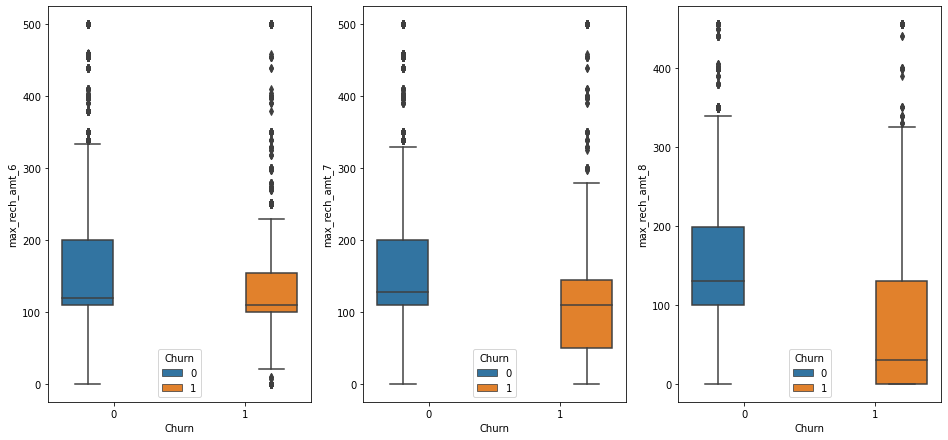

In [51]:
box_plot(["max_rech_amt_6","max_rech_amt_7","max_rech_amt_8"],high_valued_customer)

we can observe that there is significat drop in maximum recharge amount in 8 month

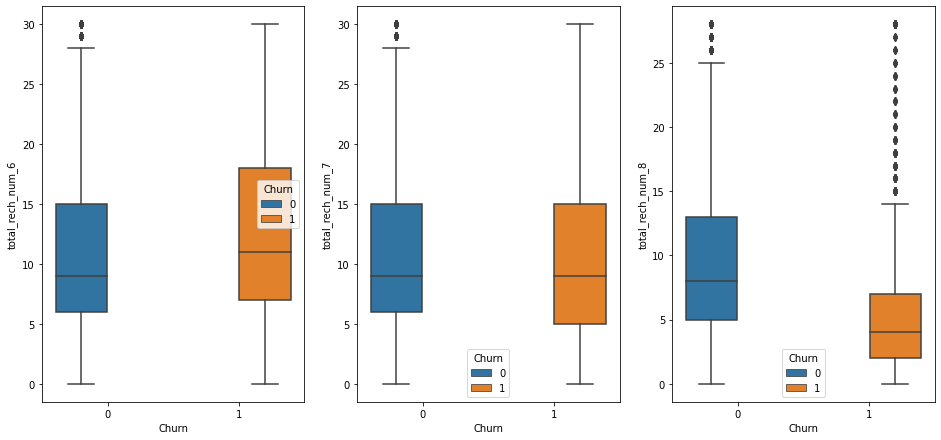

In [52]:
box_plot(["total_rech_num_6","total_rech_num_7","total_rech_num_8"],high_valued_customer)

The number of recharges made in 8th month is very less compared to 6th and 7th month especially for churned customers which implies that this can be a good sign to recognise those customers

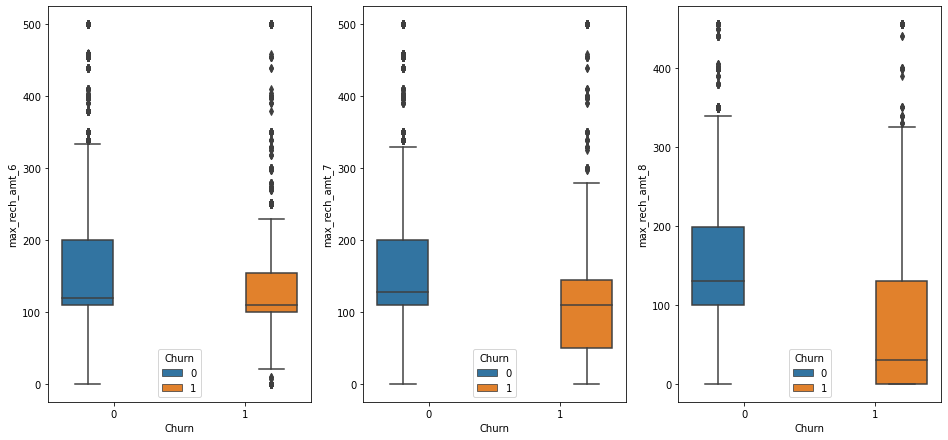

In [53]:
box_plot(["max_rech_amt_6","max_rech_amt_7","max_rech_amt_8"],high_valued_customer)

Even we can observe that the maximum amount recharged by an customer also drops significantly in the ```Action Phase``` or in 8th month

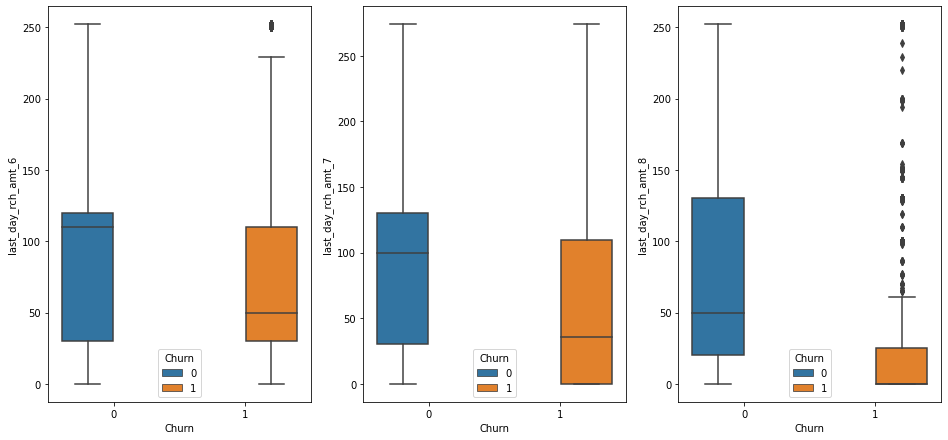

In [54]:
box_plot(["last_day_rch_amt_6","last_day_rch_amt_7","last_day_rch_amt_8"],high_valued_customer)

We are getting a huge drop in 8th month recharge amount for churned customers.

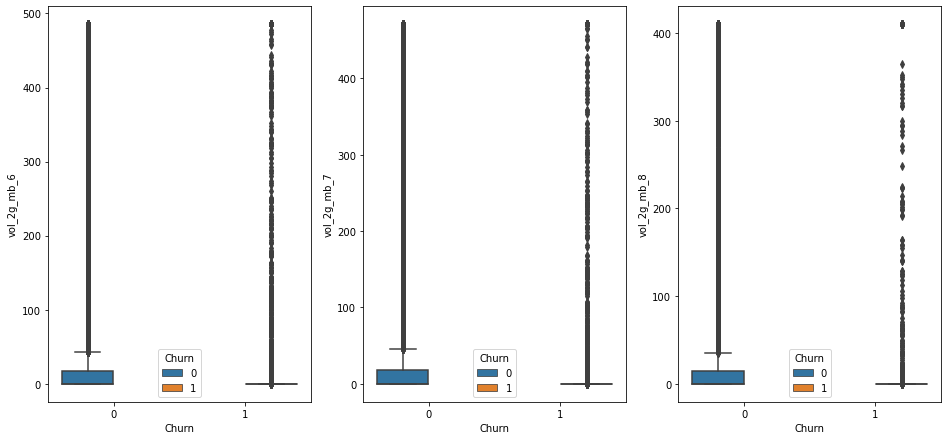

In [55]:
box_plot(["vol_2g_mb_6","vol_2g_mb_7","vol_2g_mb_8"],high_valued_customer)

we can observe that there is no difference in the usage of 2g volume services and most of the customers volume 2g mb lies i  etween 0 - 20  .Hence it doesn't play important role in finding churned customers. 

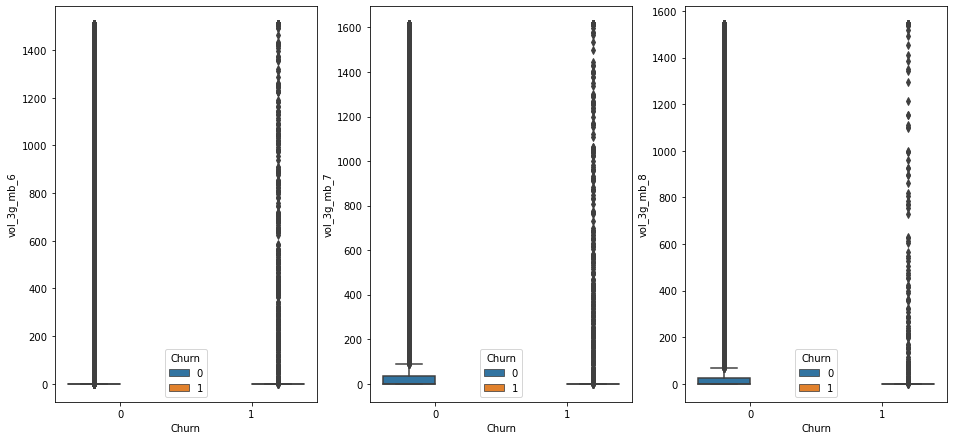

In [56]:
box_plot(["vol_3g_mb_6","vol_3g_mb_7","vol_3g_mb_8"],high_valued_customer)

we can observe that there is no difference in the usage of 3g volume services , similar to the vol 2g mb it has most of the users who spends data in range of 0-50 and there is no significant difference between chustomers who churned and not churned. Hence it doesn't play important role in finding churned customers.

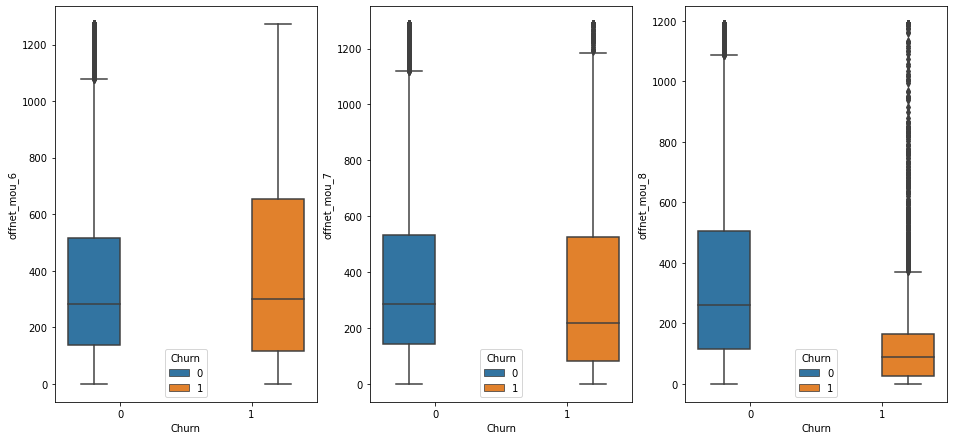

In [57]:
box_plot(["offnet_mou_6","offnet_mou_7","offnet_mou_8"],high_valued_customer)

We can see the drop for offnet mou services in the 8th month

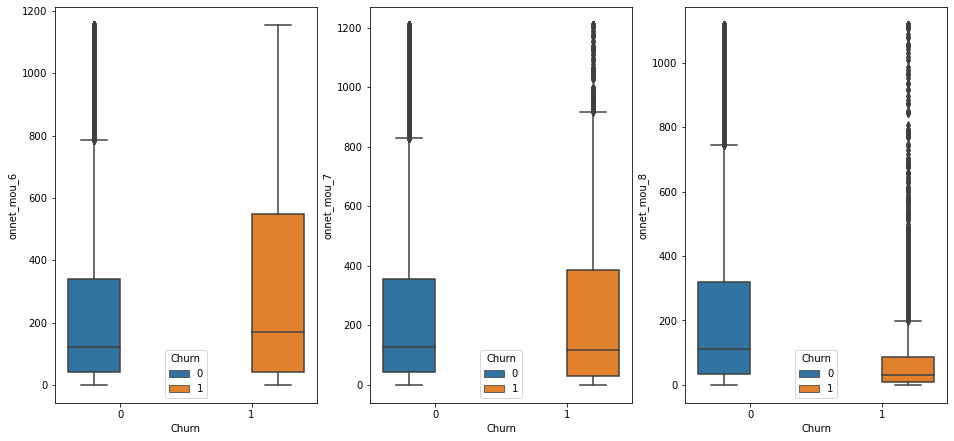

In [58]:
box_plot(["onnet_mou_6","onnet_mou_7","onnet_mou_8"],high_valued_customer)

We also see that there is a drop in Onnet usage in the 8th month for churned customers

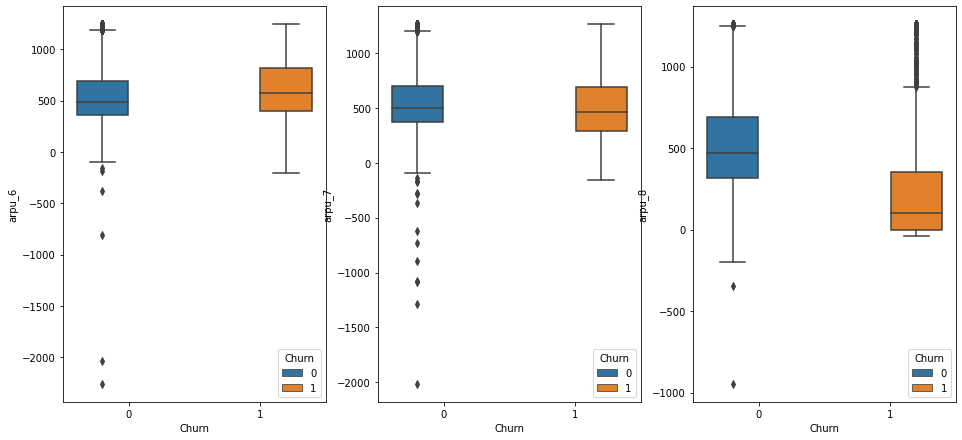

In [59]:
box_plot(["arpu_6","arpu_7","arpu_8"],high_valued_customer)

we can observe that  there is a significat drop in the ```Average Revenue Per Unit``` in the ```Action Phase```  compared to ```Good Phase``` 

In [60]:
def bar_plot(col,df):
    plt.figure(figsize=(18,12))
    plt.subplot(2,3,1)
    sns.barplot(y=col[0],data=df,x="Churn",hue=df["Churn"])
    plt.subplot(2,3,2)
    sns.barplot(y=col[1],data=df,x="Churn",hue=df["Churn"])
    plt.subplot(2,3,3)
    sns.barplot(y=col[2],data=df,x="Churn",hue=df["Churn"])
    plt.show()

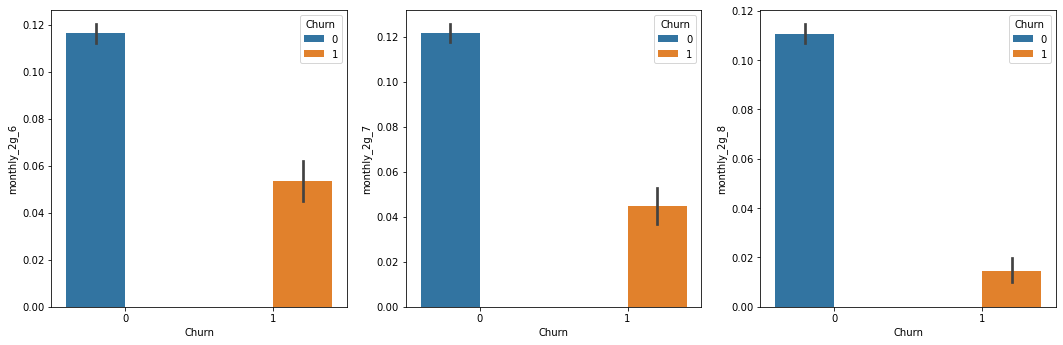

In [61]:
bar_plot(["monthly_2g_6","monthly_2g_7","monthly_2g_8"],high_valued_customer)

we can see that the service ```monthly_2g_``` is dropped in 8th month which can be indicator of churning

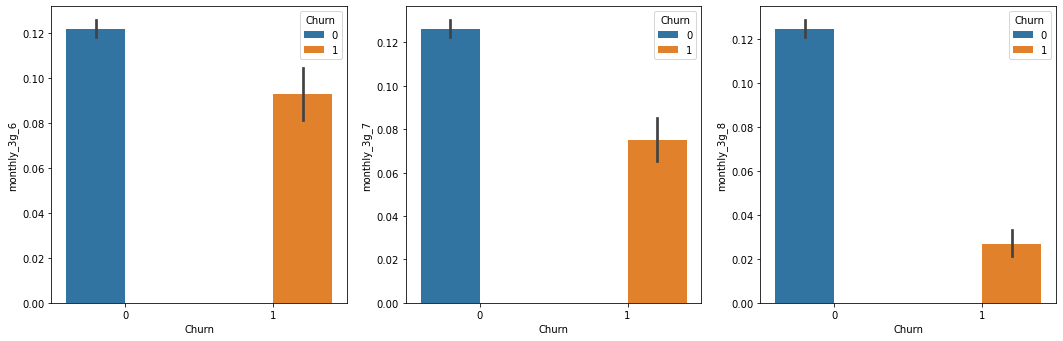

In [62]:
bar_plot(["monthly_3g_6","monthly_3g_7","monthly_3g_8"],high_valued_customer)

we can see that the service ```monthly_3g_``` is dropped in 8th month which can be indicator of churning

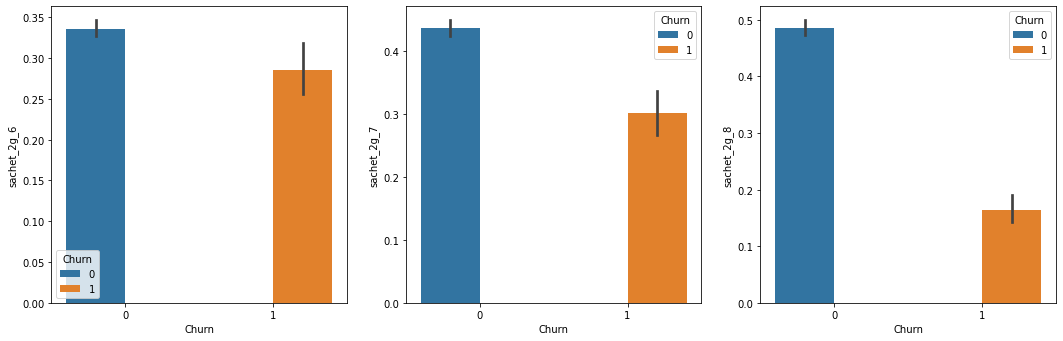

In [63]:
bar_plot(["sachet_2g_6","sachet_2g_7","sachet_2g_8"],high_valued_customer)

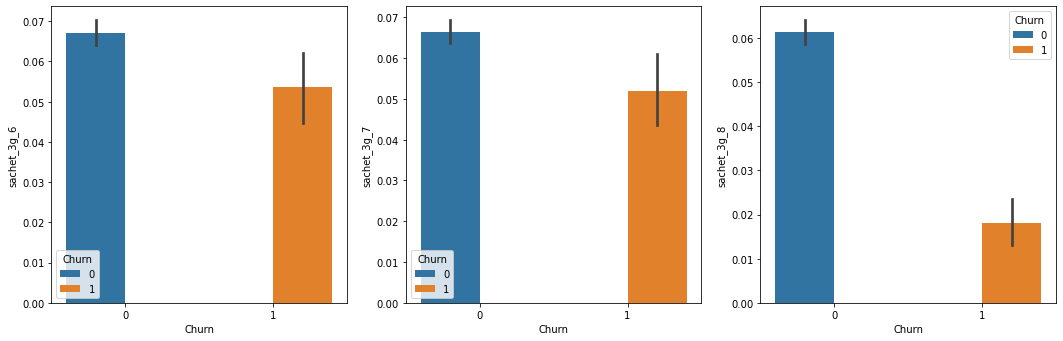

In [64]:
bar_plot(["sachet_3g_6","sachet_3g_7","sachet_3g_8"],high_valued_customer)

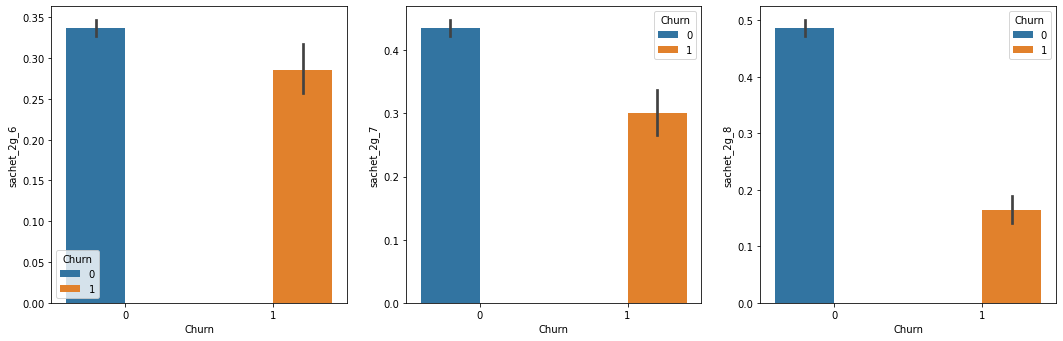

In [65]:
bar_plot(["sachet_2g_6","sachet_2g_7","sachet_2g_8"],high_valued_customer)

We can see the drop in sachet services in 8th month for churned cutsomers

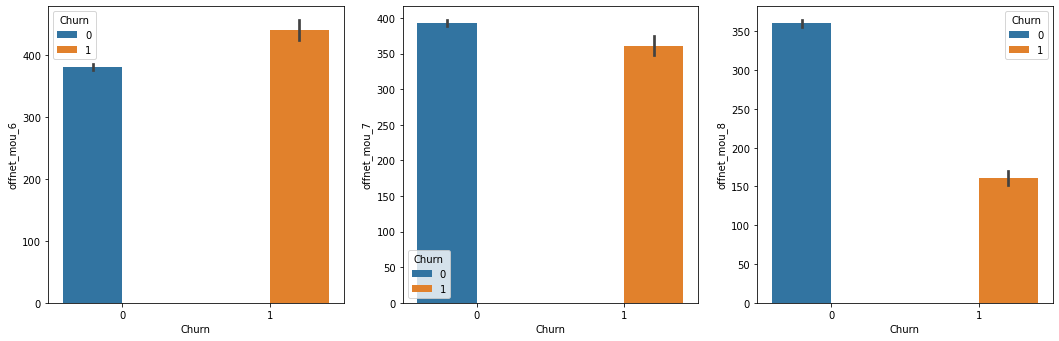

In [66]:
bar_plot(["offnet_mou_6","offnet_mou_7","offnet_mou_8"],high_valued_customer)

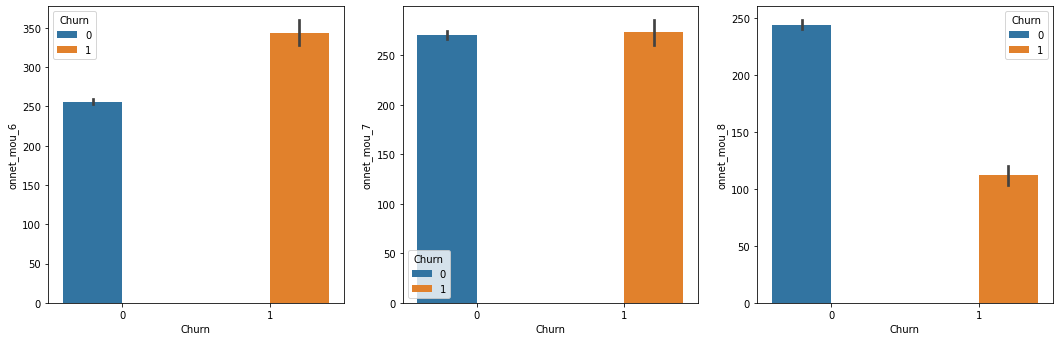

In [67]:
bar_plot(["onnet_mou_6","onnet_mou_7","onnet_mou_8"],high_valued_customer)

we can observe that offnet and  onnet usege by churned customers in the 8th month significantly drops

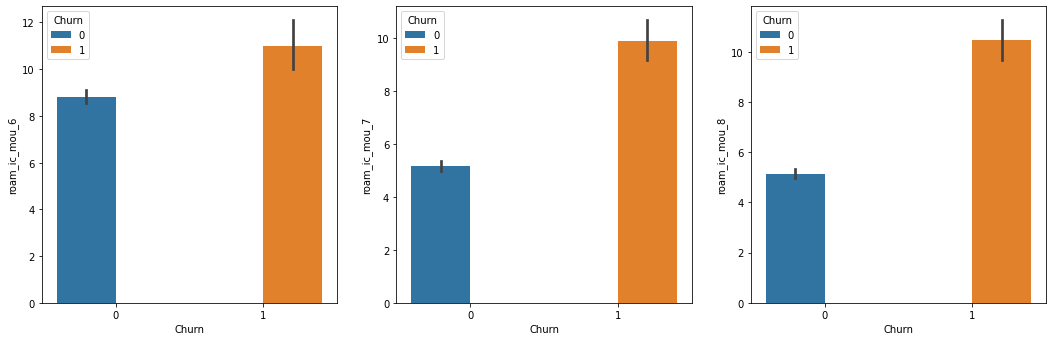

In [68]:
bar_plot(["roam_ic_mou_6","roam_ic_mou_7","roam_ic_mou_8"],high_valued_customer)

```roam_ic_mou_``` is not useful for identifying the churnable customers

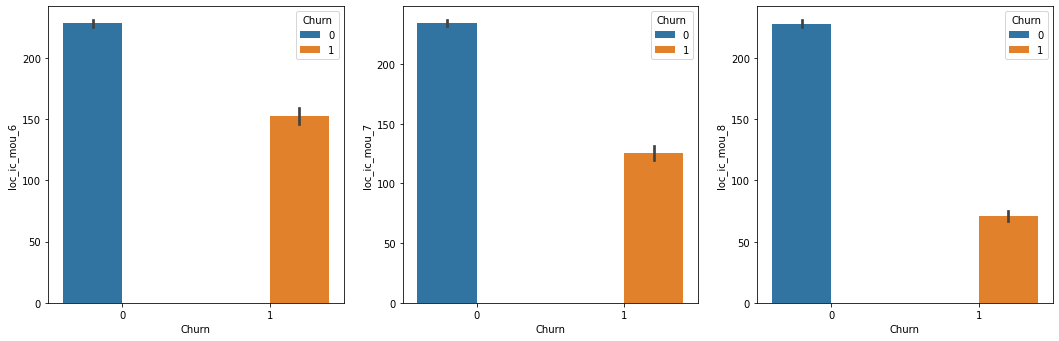

In [69]:
bar_plot(["loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8"],high_valued_customer)

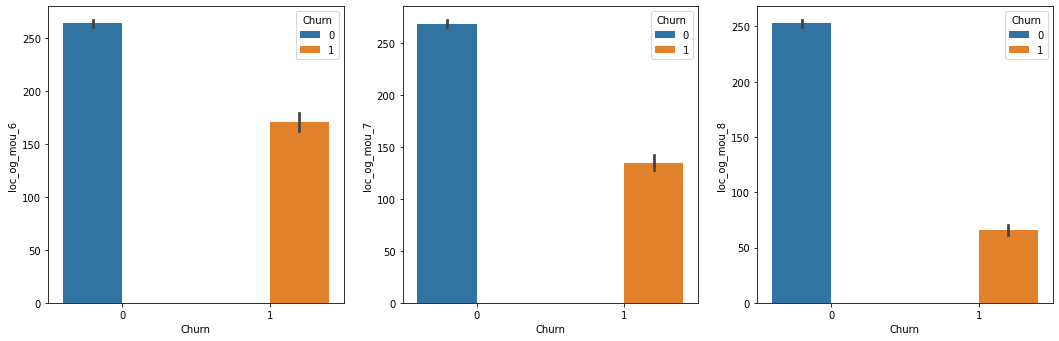

In [70]:
bar_plot(["loc_og_mou_6","loc_og_mou_7","loc_og_mou_8"],high_valued_customer)

we can observe that local incoming and outgoing calls of churned customers is significantly drop in the action phase or 8th month

### correlations

In [71]:
high_valued_customer.corr()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_good_phase_rech_amt,Churn
arpu_6,1.00,0.44,0.37,0.36,0.15,0.13,0.53,0.25,0.22,0.11,0.09,0.10,0.13,0.10,0.11,0.24,0.15,0.13,0.33,0.20,0.19,0.15,0.10,0.09,0.09,0.00,0.01,0.35,0.22,0.20,0.25,0.08,0.06,0.29,0.10,0.08,0.07,0.04,0.04,0.39,0.14,0.10,0.15,0.07,0.08,0.16,0.04,0.03,0.14,nan,nan,0.61,0.28,0.22,0.18,0.11,0.10,0.23,0.15,0.13,0.10,0.07,0.06,0.23,0.15,0.13,0.17,0.08,0.07,0.17,0.07,0.06,0.06,0.04,0.03,0.19,0.08,0.07,0.27,0.16,0.13,0.03,-0.08,-0.01,0.10,0.05,0.04,0.08,0.04,0.04,0.42,0.10,0.09,0.92,0.41,0.37,0.30,0.14,0.18,0.21,0.07,0.12,0.07,0.00,0.02,0.20,0.13,0.13,0.03,-0.02,-0.00,0.02,-0.03,-0.03,0.20,0.11,0.14,0.06,0.01,0.02,0.01,0.12,0.13,0.18,0.08,0.80,0.07
arpu_7,0.44,1.00,0.63,0.16,0.35,0.28,0.27,0.51,0.40,0.09,0.11,0.12,0.09,0.12,0.14,0.12,0.23,0.19,0.17,0.31,0.25,0.10,0.14,0.12,0.02,0.09,0.06,0.18,0.33,0.27,0.11,0.26,0.21,0.14,0.30,0.24,0.03,0.07,0.06,0.17,0.40,0.31,0.08,0.13,0.11,0.04,0.15,0.12,0.02,nan,nan,0.29,0.60,0.45,0.08,0.17,0.15,0.11,0.21,0.18,0.05,0.08,0.07,0.11,0.21,0.18,0.09,0.17,0.15,0.08,0.17,0.14,0.04,0.06,0.05,0.10,0.19,0.16,0.12,0.26,0.22,-0.02,-0.01,-0.01,0.04,0.09,0.08,0.02,0.07,0.05,0.13,0.38,0.27,0.44,0.91,0.62,0.16,0.30,0.30,0.14,0.22,0.20,0.01,0.06,0.05,0.11,0.21,0.17,-0.01,0.04,0.01,-0.02,0.02,-0.01,0.12,0.21,0.17,0.02,0.06,0.03,-0.01,0.15,0.16,0.10,0.09,0.82,-0.05
arpu_8,0.37,0.63,1.00,0.10,0.23,0.42,0.20,0.36,0.59,0.10,0.07,0.12,0.10,0.05,0.13,0.14,0.21,0.32,0.19,0.28,0.42,0.14,0.16,0.22,0.01,0.03,0.12,0.20,0.30,0.44,0.04,0.15,0.30,0.05,0.17,0.34,0.06,0.08,0.12,0.07,0.23,0.44,0.08,0.09,0.16,0.01,0.06,0.20,-0.01,nan,nan,0.19,0.41,0.67,0.10,0.17,0.25,0.13,0.20,0.29,0.08,0.10,0.14,0.13,0.21,0.30,0.07,0.13,0.22,0.07,0.13,0.22,0.05,0.06,0.10,0.08,0.14,0.25,0.14,0.23,0.35,-0.01,-0.02,0.03,0.04,0.07,0.12,0.03,0.06,0.10,0.06,0.21,0.45,0.35,0.63,0.94,0.18,0.27,0.47,0.13,0.23,0.35,0.02,0.04,0.11,0.12,0.17,0.25,0.01,0.03,0.08,-0.02,0.00,0.05,0.12,0.16,0.25,0.02,0.03,0.08,0.06,0.21,0.15,0.12,0.13,0.59,-0.27
onnet_mou_6,0.36,0.16,0.10,1.00,0.75,0.63,-0.00,-0.07,-0.06,-0.01,0.03,0.05,0.03,0.08,0.09,0.30,0.23,0.18,-0.07,-0.11,-0.10,-0.10,-0.12,-0.12,0.07,0.04,0.05,0.12,0.05,0.03,0.85,0.64,0.54,0.06,-0.00,0.01,-0.08,-0.08,-0.07,0.60,0.41,0.36,-0.

In [72]:
month_6 = high_valued_customer.loc[:,high_valued_customer.columns.str.endswith('_6')]
month_6['Churn'] = high_valued_customer['Churn']

month_7 = high_valued_customer.loc[:,high_valued_customer.columns.str.endswith('_7')]
month_7['Churn'] = high_valued_customer['Churn']

month_8 = high_valued_customer.loc[:,high_valued_customer.columns.str.endswith('_8')]
month_8['Churn'] = high_valued_customer['Churn']


In [73]:
month_6.corr().loc['Churn',:].sort_values()

loc_og_mou_6         -0.10
loc_ic_mou_6         -0.10
loc_og_t2m_mou_6     -0.10
loc_ic_t2m_mou_6     -0.09
loc_ic_t2f_mou_6     -0.08
loc_og_t2f_mou_6     -0.08
total_ic_mou_6       -0.08
loc_og_t2t_mou_6     -0.08
loc_ic_t2t_mou_6     -0.07
monthly_2g_6         -0.06
std_ic_t2f_mou_6     -0.05
std_og_t2f_mou_6     -0.05
vol_3g_mb_6          -0.04
last_day_rch_amt_6   -0.04
max_rech_amt_6       -0.03
vol_2g_mb_6          -0.03
monthly_3g_6         -0.02
sachet_2g_6          -0.02
sachet_3g_6          -0.02
spl_ic_mou_6         -0.01
ic_others_6          -0.01
loc_og_t2c_mou_6      0.01
std_ic_t2m_mou_6      0.01
isd_ic_mou_6          0.01
spl_og_mou_6          0.02
std_ic_mou_6          0.02
isd_og_mou_6          0.02
og_others_6           0.03
roam_ic_mou_6         0.03
std_ic_t2t_mou_6      0.03
roam_og_mou_6         0.04
offnet_mou_6          0.05
arpu_6                0.07
total_rech_num_6      0.07
total_rech_amt_6      0.07
onnet_mou_6           0.08
total_og_mou_6        0.08
s

from above we can see that spl_ic_mou_6, ic_others_6 , loc_og_t2c_mou_6, std_ic_t2m_mou_6, isd_ic_mou_6

In [74]:
month_7.corr().loc['Churn',:].sort_values()

loc_og_mou_7         -0.15
loc_ic_mou_7         -0.14
loc_og_t2m_mou_7     -0.14
loc_ic_t2m_mou_7     -0.14
total_ic_mou_7       -0.14
loc_og_t2t_mou_7     -0.11
loc_ic_t2t_mou_7     -0.11
last_day_rch_amt_7   -0.10
loc_ic_t2f_mou_7     -0.10
loc_og_t2f_mou_7     -0.10
max_rech_amt_7       -0.07
monthly_2g_7         -0.07
vol_3g_mb_7          -0.07
total_rech_amt_7     -0.06
std_ic_t2f_mou_7     -0.06
arpu_7               -0.05
std_og_t2f_mou_7     -0.05
vol_2g_mb_7          -0.05
monthly_3g_7         -0.04
sachet_2g_7          -0.04
ic_others_7          -0.04
std_ic_t2m_mou_7     -0.03
total_og_mou_7       -0.03
std_ic_mou_7         -0.03
offnet_mou_7         -0.03
total_rech_num_7     -0.02
sachet_3g_7          -0.02
spl_ic_mou_7         -0.01
isd_ic_mou_7         -0.01
std_ic_t2t_mou_7     -0.00
spl_og_mou_7         -0.00
onnet_mou_7           0.00
loc_og_t2c_mou_7      0.00
isd_og_mou_7          0.01
std_og_t2t_mou_7      0.03
std_og_t2m_mou_7      0.04
std_og_mou_7          0.05
r

from above month_*7 the variables std_ic_t2t_mou_7, spl_og_mou_7, onnet_mou_7, loc_og_t2c_mou_7,og_others , are least correlated with churn almost 0, 

In [75]:
month_8.corr().loc['Churn',:].sort_values()

arpu_8               -0.27
total_rech_amt_8     -0.27
total_ic_mou_8       -0.25
total_og_mou_8       -0.22
max_rech_amt_8       -0.22
last_day_rch_amt_8   -0.21
loc_og_mou_8         -0.21
loc_ic_mou_8         -0.21
loc_og_t2m_mou_8     -0.21
loc_ic_t2m_mou_8     -0.21
total_rech_num_8     -0.18
loc_ic_t2t_mou_8     -0.17
offnet_mou_8         -0.17
loc_og_t2t_mou_8     -0.17
loc_ic_t2f_mou_8     -0.14
loc_og_t2f_mou_8     -0.13
std_ic_mou_8         -0.13
std_ic_t2m_mou_8     -0.12
onnet_mou_8          -0.12
vol_3g_mb_8          -0.11
std_og_mou_8         -0.11
spl_og_mou_8         -0.10
std_ic_t2t_mou_8     -0.10
vol_2g_mb_8          -0.09
std_ic_t2f_mou_8     -0.09
std_og_t2m_mou_8     -0.09
monthly_2g_8         -0.09
monthly_3g_8         -0.09
std_og_t2t_mou_8     -0.08
sachet_2g_8          -0.08
ic_others_8          -0.08
std_og_t2f_mou_8     -0.08
spl_ic_mou_8         -0.07
isd_ic_mou_8         -0.06
loc_og_t2c_mou_8     -0.06
sachet_3g_8          -0.05
isd_og_mou_8         -0.03
r

from month_*8 there are variables which plays an important role in finding the CHurn 

In [76]:
# dropping the variables which are not useful for further analysys..
#from eda and correlation we can observe that following columns are insignificant or not useful for the analysis 
insignificant_cols = ["monthly_2g_6","monthly_2g_7","monthly_2g_8","monthly_3g_6","monthly_3g_7",
                      "monthly_3g_8","std_ic_t2t_mou_7","spl_og_mou_7","onnet_mou_7","loc_og_t2c_mou_7",
                      "og_others_6","og_others_7","spl_ic_mou_6","ic_others_6","loc_og_t2c_mou_6",
                      "std_ic_t2m_mou_6","isd_ic_mou_6"]
high_valued_customer = high_valued_customer.drop(insignificant_cols,axis=1)
high_valued_customer.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_8,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_7,isd_ic_mou_8,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_good_phase_rech_amt,Churn
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000701601,"1,069.18","1,261.42","1,258.56",57.84,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,33.59,34.09,31.31,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,7.92,7.18,60.86,75.14,77.84,0.00,0.18,0.55,4.50,6.50,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,72.61,76.05,39.53,427.88,355.23,188.04,36.89,30.39,126.99,121.88,12.24,12.31,10.98,180.54,173.08,191.95,626.46,558.04,428.74,0.00,0.00,14.53,31.59,4.83,3.93,5.00,5.00,7.00,"1,480.00",790.00,"1,494.00",500.00,500.00,455.00,0.00,0.00,252.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,802.00,57.74,19.38,18.74,0.00,"1,185.00",1
7001524846,378.72,492.22,137.36,413.69,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.00,0.00,0.00,0.00,10.23,0.00,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.10,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.00,0.00,0.00,0.00,0.00,19.00,21.00,14.00,437.00,601.00,120.00,90.00,154.00,30.00,50.00,0.00,10.00,0.00,356.00,0.03,0.00,750.95,11.94,0.00,1.00,3.00,0.00,0.00,0.00,315.00,21.03,845.32,122.16,0.00,519.00,0
7002191713,492.85,205.67,593.26,501.76,534.24,413.31,119.28,482.46,23.53,63.34,62.80,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.00,0.00,0.55,0.00,4.78,0.00,907.09,192.41,"1,015.26",67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,64.94,61.56,29.79,121.88,0.00,0.00,1.91,200.64,68.09,191.95,932.84,172.58,926.56,0.00,0.00,51.98,46.48,4.83,3.93,6.00,4.00,11.00,507.00,253.00,717.00,110.00,110.00,130.00,110.00,50.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,"2,607.00",0.00,0.00,0.00,0.00,380.00,0
7000875565,430.98,299.87,187.89,50.51,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.00,315.91,215.64,205.93,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,30.89,67.09,21.53,0.00,0.00,0.00,0.00,5.91,0.00,34

In [77]:
high_valued_customer.shape

(30011, 110)

## Model Building

### Splitting dataset into Train and Test set

In [78]:
df_pca = high_valued_customer.copy()

In [79]:
df_pca_train,df_pca_test = train_test_split(df_pca,train_size=0.7,random_state=100)
print(df_pca_train.shape)
print(df_pca_test.shape)


(21007, 110)
(9004, 110)


In [87]:
# dividing training and testing data and x,y variables
X_train = df_pca_train.drop('Churn',axis = 1)
y_train = df_pca_train['Churn']
print('X_train size: ',X_train.shape)
print('y_train size: ',y_train.shape)

#
X_test = df_pca_test.drop('Churn',axis = 1)
y_test = df_pca_test['Churn']
print('X_test size: ',X_test.shape)
print('y_test size: ',y_test.shape)



X_train size:  (21007, 109)
y_train size:  (21007,)
X_test size:  (9004, 109)
y_test size:  (9004,)


In [88]:
# storing the column names 
X_train_cols = X_train.columns

X_test_cols = X_test.columns


In [89]:
# scaling the variables 
scaler = StandardScaler()
X_train[X_train_cols] = scaler.fit_transform(X_train)
X_test[X_test_cols] = scaler.transform(X_test)

In [90]:
# converting the ndarray to the dataframe 
#X_train = pd.DataFrame(X_train,columns=[X_train_cols])
#X_test = pd.DataFrame(X_test,columns=[X_test_cols])
#print(X_train.head())
print()
#print(X_test.head())
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_8,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_7,isd_ic_mou_8,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_good_phase_rech_amt
mobile_number,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7000476032,-0.81,-0.28,-0.38,0.23,0.62,-0.68,-0.93,-0.79,-0.38,-0.35,-0.36,-0.39,-0.37,-0.36,-0.75,-0.74,-0.65,-0.94,-0.96,-0.92,-0.55,-0.55,-0.54,-0.42,-0.98,-0.99,-0.92,0.63,1.33,1.06,-0.17,-0.41,-0.24,-0.34,-0.35,-0.33,0.22,0.51,0.43,-0.28,-0.27,-0.26,3.03,-0.25,0.00,-0.30,-0.06,-0.13,-0.80,-0.74,-0.80,-0.94,-0.87,-0.96,-0.58,-0.59,-0.58,-0.99,-0.93,-0.99,3.18,3.20,1.06,2.66,-0.39,-0.40,-0.39,1.40,1.59,2.65,-0.62,-0.53,-0.37,-0.24,-0.28,-0.38,-0.37,-0.38,-0.38,1.03,1.70,2.10,-0.87,-0.31,-0.34,-1.15,-0.81,-0.92,-1.21,-0.89,-0.89,-0.41,1.33,-0.40,-0.44,-0.46,-0.45,-0.41,0.55,-0.43,-0.27,-0.26,-0.24,-0.96,-0.43,-0.43,-0.42,-0.27,-0.72
7002362029,-0.85,-0.19,-0.09,-0.48,-0.34,-0.49,-0.79,-0.54,-0.38,-0.35,-0.36,-0.39,-0.37,-0.36,0.42,-0.47,0.75,0.17,-0.47,-0.26,1.96,2.76,3.15,-0.42,0.27,-0.45,0.24,-0.58,-0.58,-0.54,-0.63,-0.63,-0.59,-0.34,-0.35,-0.33,-0.77,-0.78,-0.70,-0.28,-0.27,-0.26,0.23,-0.18,0.00,-0.61,-0.99,-0.54,-0.53,-0.67,-0.23,2.36,0.64,0.75,3.15,1.31,3.14,1.75,0.28,1.12,-0.34,-0.54,-0.66,-0.64,-0.39,-0.08,-0.25,-0.64,-0.65,-0.68,1.29,0.06,0.76,-0.24,-0.28,0.58,0.57,-0.38,-0.38,-0.90,-0.58,-0.91,-1.11,-0.07,-0.32,-0.44,0.31,0.44,0.27,0.23,1.44,-0.41,-0.34,0.09,-0.44,-0.25,0.09,-0.41,-0.40,-0.43,-0.27,-0.26,-0.24,-0.19,0.33,-0.14,-0.18,2.64,-0.71
7002395145,-0.95,0.84,0.17,-0.74,-0.49,-0.53,0.44,0.21,-0.38,-0.35,-0.36,-0.39,-0.37,-0.36,-0.48,0.14,0.22,0.23,2.12,1.57,-0.08,0.27,-0.36,-0.42,-0.09,1.40,1.05,-0.58,-0.58,-0.54,-0.63,-0.60,-0.59,-0.34,-0.35,-0.33,-0.77,-0.75,-0.70,2.89,4.05,4.12,-0.58,-0.60,0.00,-0.80,-0.06,-0.16,-0.39,-0.00,-0.14,-0.25,0.88,0.27,-0.49,-0.35,-0.51,-0.39,0.49,0.03,-0.56,-0.54,-0.66,-0.64,-0.39,-0.40,-0.39,-0.63,-0.72,-0.69,1.19,2.58,1.98,-0.24,-0.28,3.58,3.60,-0.38,-0.38,0.06,0.62,0.73,-1.08,0.77,0.17,-1.15,-0.37,-0.92,-0.81,0.36,-0.40,-0.41,-0.41,-0.40,-0.44,-0.46,-0.45,-0.41,-0.40,-0.43,-0.27,-0.26,-0.24,1.09,-0.43,-0.43,-0.42,-0.27,-0.18
7001527400,-0.24,0.03,0.11,-0.27,-0.41,0.76,0.64,1.47,-0.38,-0.35,-0.36,-0.39,-0.37,-0.36,1.14,3.00,0.46,0.03,0.06,-0.24,-0.51,-0.55,-0.49,-0.42,0.35,1.29,-0.07,-0.58,-0.55,-0.53,1.13,0.91,2.29,-0.34,-0.35,-0.33,0.25,0.14,0.88,-0.28,-0.27,-0.26,-0.58,-0.60,0.00,0.33,0.69,0.66,-0.78,-0.77,-0.77,-0.78,-0.93,-0.90,-0.23,0.63,-0.22,-0.84,-0.85,-0.91,-0.49,0.03,0.37,0.71,-0.39,-0.40,0.18,

#### PCA 

In [91]:
# Applying SMOTE for imbalanced dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)
X_train_res,y_train_res = sm.fit_resample(X_train,y_train)
# X_train_res,y_train_res are balanced training data


In [92]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1823
Before OverSampling, counts of label '0': 19184 

After OverSampling, the shape of train_X: (38368, 109)
After OverSampling, the shape of train_y: (38368,) 

After OverSampling, counts of label '1': 19184
After OverSampling, counts of label '0': 19184


In [93]:
pca = PCA(random_state=100,svd_solver='randomized')
pca.fit(X_train_res)

PCA(random_state=100, svd_solver='randomized')

In [94]:
pca.components_

array([[ 5.02440316e-02,  1.19377090e-01,  1.70535345e-01, ...,
         5.04860080e-02,  3.89934919e-02,  9.74705251e-02],
       [ 1.18907490e-01,  1.71578113e-01,  1.24461838e-01, ...,
        -6.81956294e-02, -1.90181508e-02,  1.68361399e-01],
       [-5.91250349e-02,  1.41229445e-01,  1.99899566e-01, ...,
         1.05940173e-01,  4.81251036e-02,  6.33132718e-02],
       ...,
       [-6.66065807e-04,  6.03528621e-03,  5.95761315e-03, ...,
        -1.25893859e-03, -5.32676203e-04,  1.08728042e-03],
       [ 1.10115354e-03, -3.34696461e-03, -1.80602474e-03, ...,
        -2.23914950e-03, -2.35883371e-04,  5.38944780e-04],
       [-0.00000000e+00, -1.10336441e-16,  7.30232438e-17, ...,
         3.05501256e-16,  3.18479845e-17, -1.07530958e-16]])

In [95]:
# looking at PCA explained varianced ratio
pca.explained_variance_ratio_

array([1.59089167e-01, 1.08214552e-01, 6.57450428e-02, 5.46273354e-02,
       4.38901714e-02, 4.23918341e-02, 3.93883649e-02, 3.71453427e-02,
       2.50737684e-02, 2.38563378e-02, 2.08233923e-02, 1.84898875e-02,
       1.68942125e-02, 1.61465897e-02, 1.52926757e-02, 1.27873274e-02,
       1.22558710e-02, 1.22495721e-02, 1.17385515e-02, 1.09125847e-02,
       1.01002734e-02, 9.70535681e-03, 9.11441602e-03, 8.36100326e-03,
       8.22351715e-03, 7.97711074e-03, 7.68379109e-03, 7.54507102e-03,
       7.39570144e-03, 7.15780321e-03, 6.56736678e-03, 6.25193688e-03,
       6.07467557e-03, 5.83356031e-03, 5.75049901e-03, 5.64193491e-03,
       5.54025034e-03, 5.38471216e-03, 5.16465865e-03, 4.92084095e-03,
       4.80155754e-03, 4.46434536e-03, 4.36026835e-03, 4.23892720e-03,
       4.18096532e-03, 4.05227943e-03, 3.96860318e-03, 3.67129016e-03,
       3.51493511e-03, 3.35591081e-03, 3.28931466e-03, 3.08027210e-03,
       3.01737985e-03, 2.93503516e-03, 2.88586158e-03, 2.80861590e-03,
      

Making a scree plot for the explained variance

In [96]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

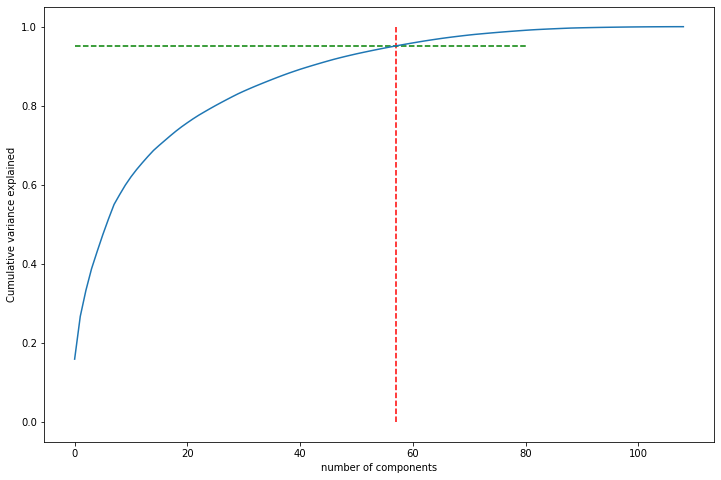

In [97]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=57, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.xlabel('number of components')
plt.ylabel("Cumulative variance explained")

plt.show()

we are taking 57  components for analysis because they almost explain the 95% of thr variance 

In [98]:
pca_final = IncrementalPCA(n_components=57)
df_train_pca = pca_final.fit_transform(X_train_res)

In [99]:
df_train_pca.shape # this is transformed X_train_pca

(38368, 57)

In [100]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [101]:
corrmat.shape

(57, 57)

Plotting the heatmap of the corr matrix

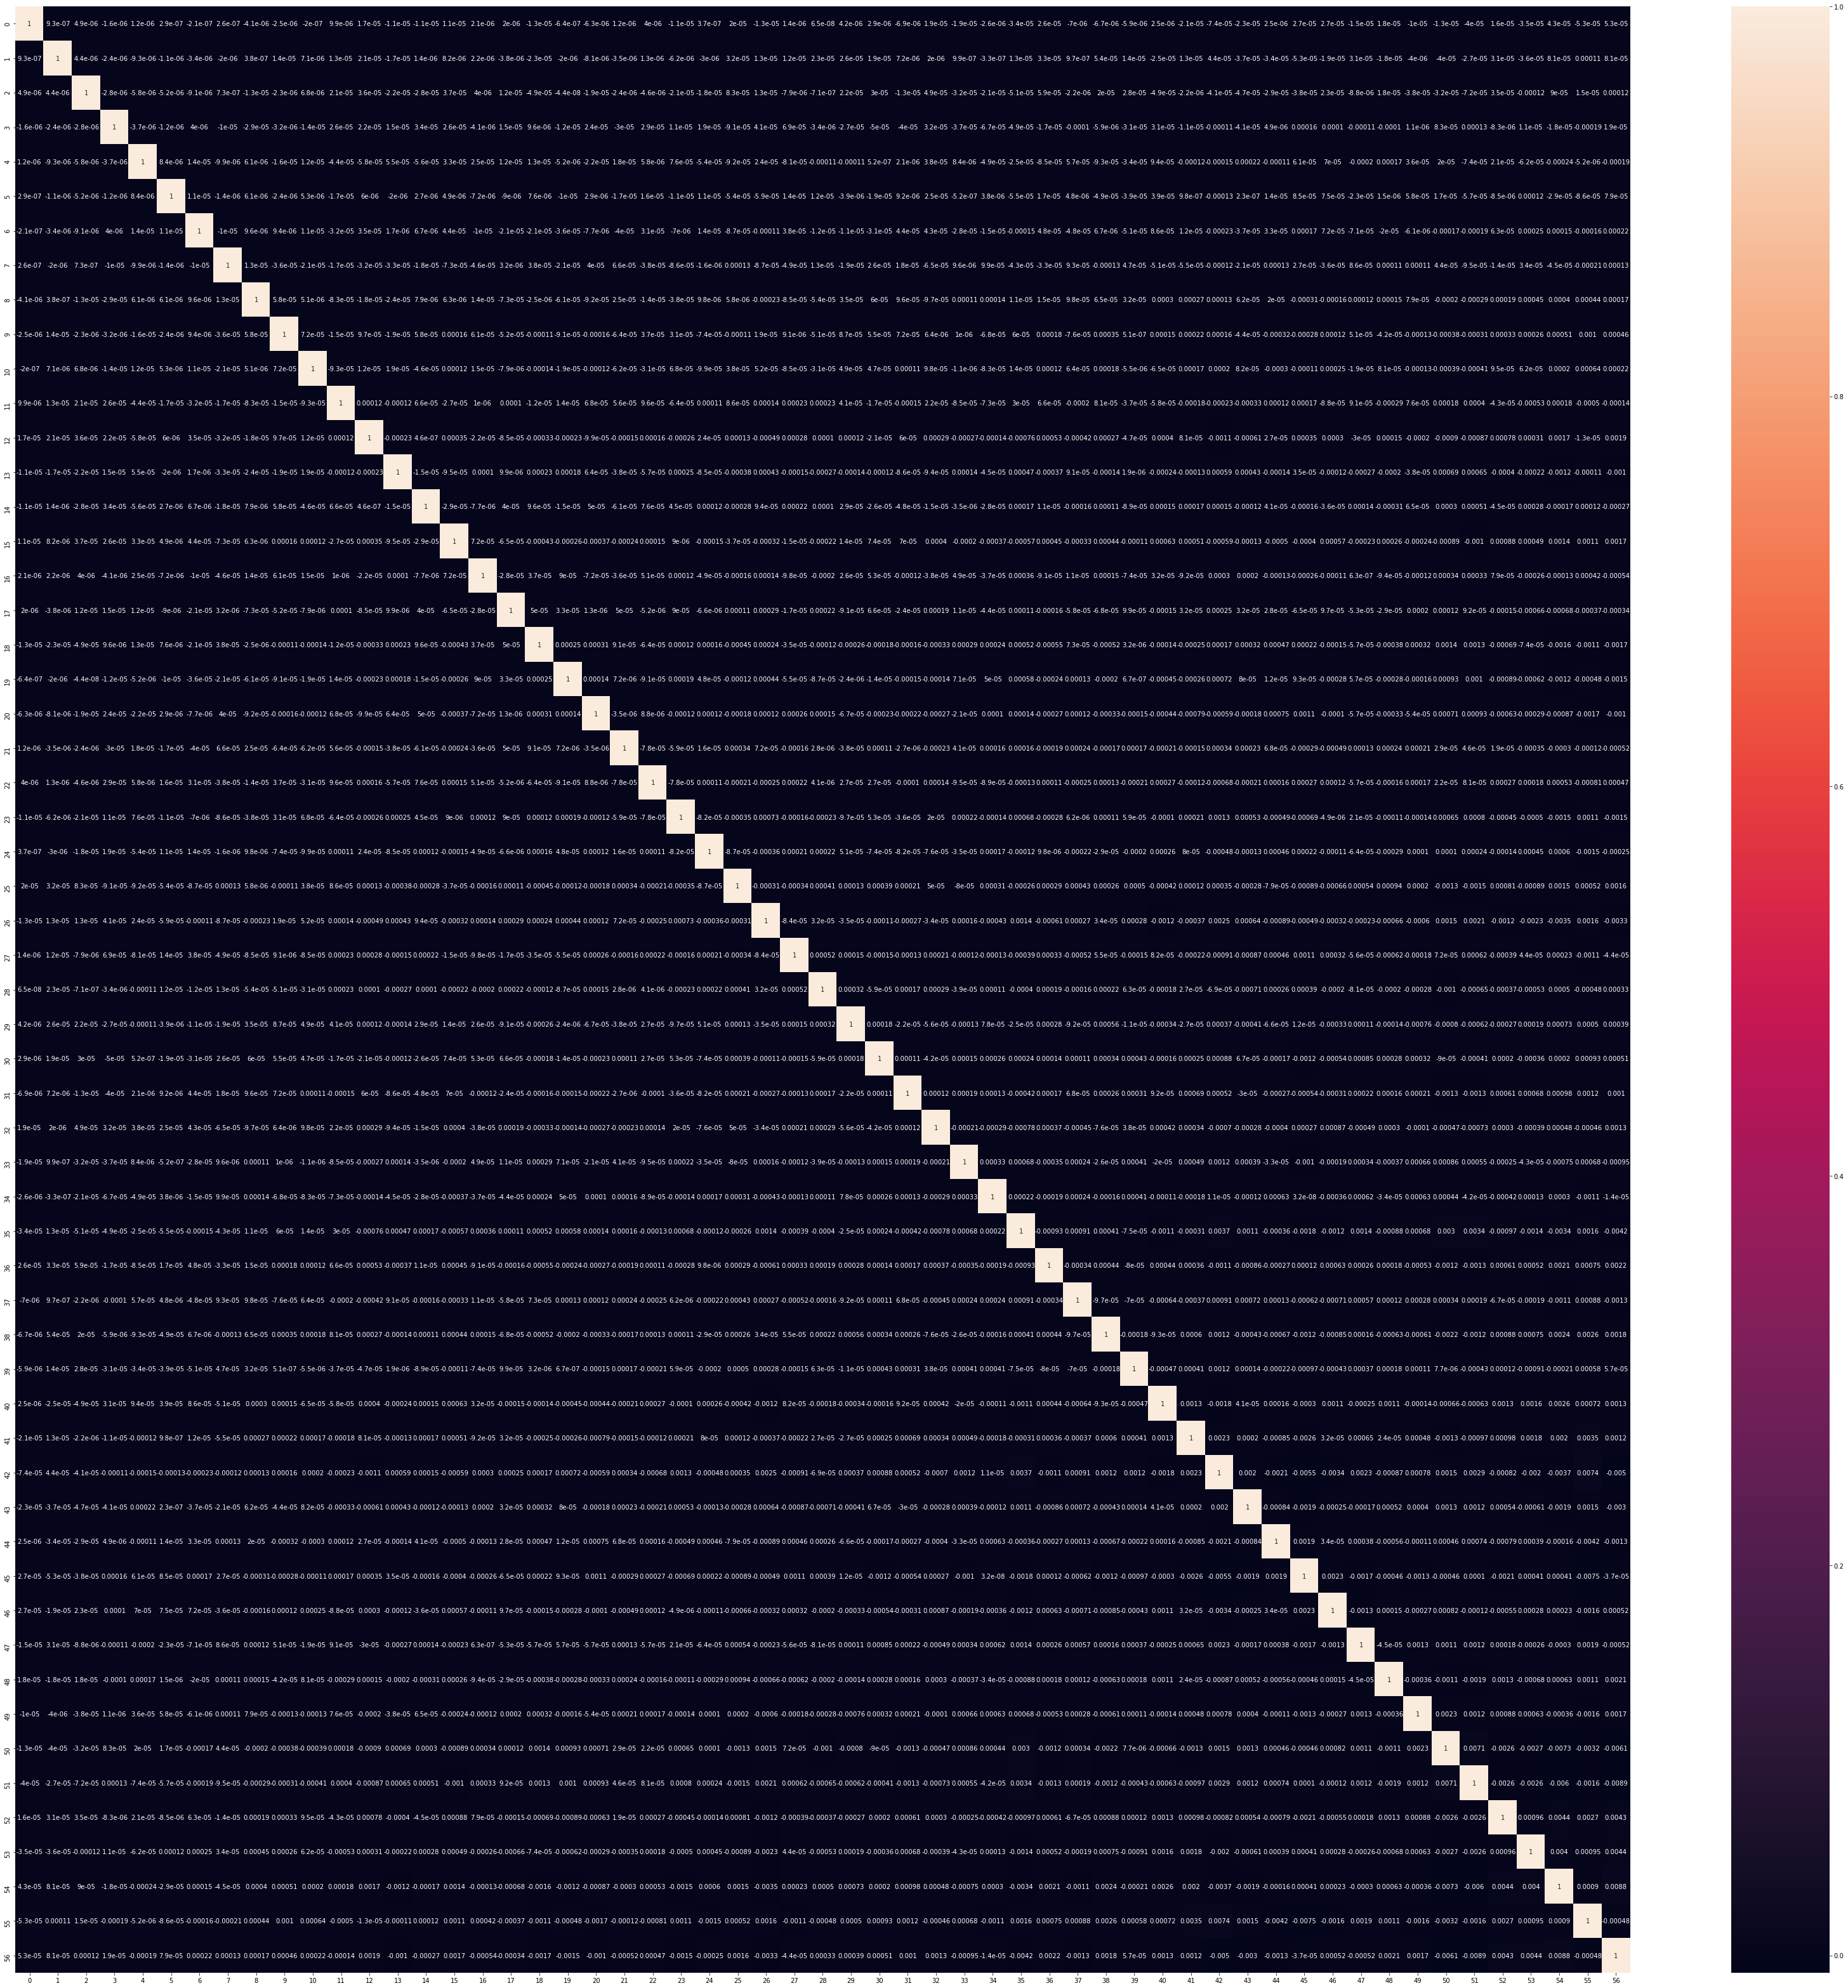

In [102]:
plt.figure(figsize=[57,57])
sns.heatmap(corrmat, annot=True)

from above we can see that there is no multicollinearity in the dataset

In [103]:
# applying transformation on testset
# we dont need to apply smote here because we've already trained model on balanced dataset
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape # transformed X_test pca

(9004, 57)

## Building Predictive models 

### Functions 

In [104]:
def evaluation_metric(actual,predicted,pred_prob=None):
    print ("Recall/Sensitivity : %.4g" % recall_score(actual, predicted))
    print('confusion metrics :\n' , confusion_matrix(actual, predicted))
    print('Accuracy of model \n', accuracy_score(actual, predicted))
    print("AUC Score : %.4g" % roc_auc_score(actual, pred_prob))


In [105]:
def metrics(actual,predicted):
    confusion = confusion_matrix(actual, predicted)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity : %.4g' % (TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity : %.4g' % (TN / float(TN+FP)))
    # Calculate false postive rate - predicting churn when customer does not have churned
    print('FPR : %.4g' % (FP/ float(TN+FP)))
    # positive predictive value 
    print ('Positive predictive value : %.4g'%(TP / float(TP+FP)))
    # Negative predictive value
    print ('Negative predictive value : %.4g'%(TN / float(TN+ FN)))

In [106]:
# function for ROC curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None #fpr, tpr, thresholds

### Logistic regression

In [84]:
# creating copies for the pca transformed variables 
X_train_pca_logreg = df_train_pca.copy()
y_train_pca_logreg = y_train_res.copy()

X_test_pca_logreg = df_test_pca.copy()
y_test_pca_logreg = y_test.copy()


NameError: name 'df_train_pca' is not defined

In [416]:
#having a loot at shapes
print(X_train_pca_logreg.shape)
print(y_train_pca_logreg.shape)
print(X_test_pca_logreg.shape)
print(y_test_pca_logreg.shape)


(38368, 57)
(38368,)
(9004, 57)
(9004,)


In [417]:
# fitting the model with best parameters 
logreg_model = LogisticRegression(penalty='l2',C=1)
# fitting the model
logreg_model.fit(X_train_pca_logreg,y_train_pca_logreg)

LogisticRegression(C=1)

In [418]:
# predicts the churn probability for train data
y_train_pred_logreg_prob = logreg_model.predict_proba(X_train_pca_logreg)[:,1]

y_train_pred_logreg_final = pd.DataFrame({'Churn':y_train_pca_logreg.values, 'Churn_Prob':y_train_pred_logreg_prob})
y_train_pred_logreg_final['CustID'] = y_train_pca_logreg.index
y_train_pred_logreg_final.head()

,Churn,Churn_Prob,CustID
0,0,0.28,0
1,0,0.00,1
2,0,0.25,2
3,0,0.17,3
4,0,0.17,4


In [419]:
# predicting churn for train data
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_logreg_final['predicted'] = y_train_pred_logreg_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_logreg_final.head()


,Churn,Churn_Prob,CustID,predicted
0,0,0.28,0,0
1,0,0.00,1,0
2,0,0.25,2,0
3,0,0.17,3,0
4,0,0.17,4,0


In [420]:
#calling evalutaion metric funtion created earlier to see the performance
evaluation_metric(y_train_pred_logreg_final.Churn, y_train_pred_logreg_final.predicted, y_train_pred_logreg_final.Churn_Prob)

Recall/Sensitivity : 0.8609
confusion metrics :
 [[16071  3113]
 [ 2668 16516]]
Accuracy of model 
 0.8493275646371977
AUC Score : 0.9159


In [421]:
#performance on the train data
metrics(y_train_pred_logreg_final.Churn, y_train_pred_logreg_final.predicted)

Sensitivity : 0.8609
Specificity : 0.8377
FPR : 0.1623
Positive predictive value : 0.8414
Negative predictive value : 0.8576


```Recall/Sensitivity``` on the train data : 86.09%

```Specificity``` on the train data : 83.77%

```Accuracy``` on the train data : 84.93%

#### Plotting ROC Curve

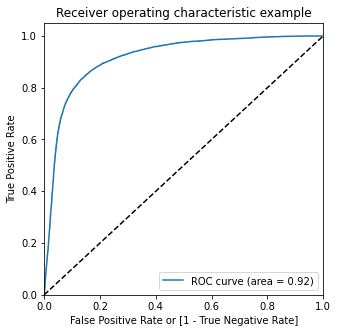

In [422]:
draw_roc(y_train_pred_logreg_final.Churn, y_train_pred_logreg_final.Churn_Prob)

the area under the curve is high and ROC Area is 0.85 hence we can go with the model

#### FInding Optimal Cutoff

In [423]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_logreg_final[i]= y_train_pred_logreg_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_logreg_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.28,0,0,1,1,1,0,0,0,0,0,0,0
1,0,0.00,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.25,2,0,1,1,1,0,0,0,0,0,0,0
3,0,0.17,3,0,1,1,0,0,0,0,0,0,0,0
4,0,0.17,4,0,1,1,0,0,0,0,0,0,0,0


In [424]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_logreg_final.Churn, y_train_pred_logreg_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.50   1.00   0.00
0.10  0.10      0.72   0.98   0.47
0.20  0.20      0.79   0.96   0.62
0.30  0.30      0.82   0.93   0.71
0.40  0.40      0.84   0.90   0.78
0.50  0.50      0.85   0.86   0.84
0.60  0.60      0.85   0.81   0.88
0.70  0.70      0.84   0.76   0.91
0.80  0.80      0.81   0.67   0.94
0.90  0.90      0.67   0.36   0.97


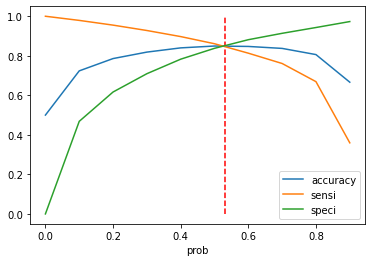

In [425]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.53, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

 From the curve above, 0.53 is the optimum point, since we are interested mostly on specificity/Recall hence taking cutoff as 0.40

In [426]:
# Final cutoff points and predictions by the model
# decreasing the final cuttoff value to increase specificity/recall as per business requirement
y_train_pred_logreg_final['final_predicted'] = y_train_pred_logreg_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_logreg_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.28,0,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.00,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.25,2,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.17,3,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.17,4,0,1,1,0,0,0,0,0,0,0,0,0


In [427]:
# Let's check the overall accuracy on the train dat after deciding the cutoff.
evaluation_metric(y_train_pred_logreg_final.Churn, y_train_pred_logreg_final.final_predicted, y_train_pred_logreg_final.Churn_Prob)

Recall/Sensitivity : 0.8971
confusion metrics :
 [[15017  4167]
 [ 1974 17210]]
Accuracy of model 
 0.8399447456213511
AUC Score : 0.9159


In [428]:
#calling evalutaion metric funtion created earlier to see the performance
metrics(y_train_pred_logreg_final.Churn, y_train_pred_logreg_final.final_predicted)

Sensitivity : 0.8971
Specificity : 0.7828
FPR : 0.2172
Positive predictive value : 0.8051
Negative predictive value : 0.8838


```Recall/Sensitivity``` on the train data after deciding the cutoff : 89.71%

```Specificity``` on the train data after deciding the cutoff : 78.28%

```Accuracy``` on the train data after deciding the cutoff: 83.99%

### Predictions on the testset

In [429]:
# predicts the churn probability for test data
y_test_pred_logreg_prob = logreg_model.predict_proba(X_test_pca_logreg)[:,1]

y_test_pred_logreg_final = pd.DataFrame({'Churn':y_test_pca_logreg.values, 'Churn_Prob':y_test_pred_logreg_prob})
y_test_pred_logreg_final['CustID'] = y_test_pca_logreg.index
y_test_pred_logreg_final.head()

,Churn,Churn_Prob,CustID
0,0,0.85,7000452524
1,0,0.61,7001703821
2,0,0.04,7001414526
3,0,0.17,7002087709
4,0,0.13,7000903521


In [430]:
# putiing final cutoff points and making predictions by the model on the data
y_test_pred_logreg_final['final_predicted'] = y_test_pred_logreg_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_test_pred_logreg_final.head()

,Churn,Churn_Prob,CustID,final_predicted
0,0,0.85,7000452524,1
1,0,0.61,7001703821,1
2,0,0.04,7001414526,0
3,0,0.17,7002087709,0
4,0,0.13,7000903521,0


In [431]:
#calling evalutaion metric funtion created earlier to see the performance on the test data
evaluation_metric(y_test_pred_logreg_final.Churn, y_test_pred_logreg_final.final_predicted,y_test_pred_logreg_final.Churn_Prob )

Recall/Sensitivity : 0.8675
confusion metrics :
 [[6487 1747]
 [ 102  668]]
Accuracy of model 
 0.7946468236339405
AUC Score : 0.9088


In [432]:
#calling evalutaion metric funtion created earlier to see the performance
metrics(y_test_pred_logreg_final.Churn, y_test_pred_logreg_final.final_predicted)

Sensitivity : 0.8675
Specificity : 0.7878
FPR : 0.2122
Positive predictive value : 0.2766
Negative predictive value : 0.9845


```Recall/Sensitivity``` on the train data after deciding the cutoff : 89.71%

```Specificity``` on the train data after deciding the cutoff : 78.28%

```Accuracy``` on the train data after deciding the cutoff: 83.99%

```Recall/Sensitivity``` on the test data after deciding the cutoff : 86.75%

```Specificity``` on the test data after deciding the cutoff : 78.78%

```Accuracy``` on the test data after deciding the cutoff: 79.46%

we also got goog AUC score so we have a good model

# Random Forest

In [121]:
# creating copies for the pca transformed variables 
X_train_pca_rf = df_train_pca.copy()
y_train_pca_rf = y_train_res.copy()

X_test_pca_rf = df_test_pca.copy()
y_test_pca_rf = y_test.copy()


In [122]:
#having a look at the shapes
print(X_train_pca_rf.shape)
print(y_train_pca_rf.shape)
print(X_test_pca_rf.shape)
print(y_test_pca_rf.shape)


(38368, 57)
(38368,)
(9004, 57)
(9004,)


In [123]:
#initializing rfc
rfc = RandomForestClassifier()

In [127]:
#fitting on the train data
rfc.fit(X_train_pca_rf,y_train_pca_rf)

RandomForestClassifier()

In [128]:
#predicting the performance before hypertunning
predictions = rfc.predict(X_train_pca_rf)
predictions

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [129]:
#importing necessary mterics
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [130]:
#performance on the test data
print ("Recall/Sensitivity : %.4g" % recall_score(y_train_pca_rf, predictions))
print('confusion metrics :\n' , confusion_matrix(y_train_pca_rf, predictions))
print('Accuracy of model \n',accuracy_score(y_train_pca_rf, predictions))
print("AUC Score : %.4g" % roc_auc_score(y_train_pca_rf, rfc.predict_proba(X_train_pca_rf)[:,1]))


Recall/Sensitivity : 1
confusion metrics :
 [[19184     0]
 [    0 19184]]
Accuracy of model 
 1.0
AUC Score : 1


In [131]:
#classification report
print("Calssification Report:\n", classification_report(y_train_pca_rf,predictions))

Calssification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19184
           1       1.00      1.00      1.00     19184

    accuracy                           1.00     38368
   macro avg       1.00      1.00      1.00     38368
weighted avg       1.00      1.00      1.00     38368



In [136]:
# prediction on testset
y_test_pred = rfc.predict(X_test_pca_rf)
y_test_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [137]:
evaluation_metric(y_test_pca_rf, y_test_pred,rfc.predict_proba(X_test_pca_rf)[:,1])

Recall/Sensitivity : 0.5701
confusion metrics :
 [[7848  386]
 [ 331  439]]
Accuracy of model 
 0.9203687250111062
AUC Score : 0.9044


since by using the default parameter the model is overfitting hence lets tine the hyperparameters to get a good model

# HyperParameter Tunning

Let's try to find the optimum values for ```max_depth``` and understand how the value of max_depth impacts the overall accuracy of the ensemble.


In [110]:
# specifying n_folds
n_folds = 5

#parameters to build model on
parameters = { "max_depth" : range(2,20,5)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,parameters,
                 cv = n_folds,
                 scoring = "accuracy",
                  n_jobs=-1,
                  verbose=3,
                 return_train_score = True)
rf.fit(X_train_pca_rf,y_train_pca_rf)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  20 | elapsed:  1.1min remaining:   44.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy', verbose=3)

In [111]:
#results on tunning the model with max_depth
scores = rf.cv_results_

In [112]:
#dataframe of results after tunning max_depth
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,8.99,0.16,0.16,0.01,2,{'max_depth': 2},0.79,0.80,0.80,0.81,0.78,0.80,0.01,4,0.81,0.80,0.80,0.81,0.78,0.80,0.01
1,31.91,1.33,0.19,0.03,7,{'max_depth': 7},0.85,0.86,0.87,0.86,0.85,0.86,0.01,3,0.87,0.87,0.87,0.87,0.87,0.87,0.00
2,49.81,1.64,0.29,0.01,12,{'max_depth': 12},0.92,0.92,0.93,0.92,0.91,0.92,0.00,2,0.96,0.96,0.96,0.96,0.96,0.96,0.00
3,54.21,1.62,0.30,0.02,17,{'max_depth': 17},0.94,0.95,0.95,0.95,0.94,0.95,0.00,1,0.98,0.98,0.98,0.98,0.98,0.98,0.00


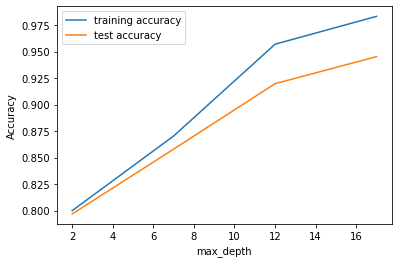

In [113]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


we can see that best ```max_depth``` is between ```8 to 12```

# Tunning  n_estimators

In [114]:
# specifying n_folds
n_folds = 3#5

#parameters to build model on
parameters = { "n_estimators" : range(100,400,100)}

rf = RandomForestClassifier(max_depth = 8)

rf = GridSearchCV(rf,parameters,
                 cv = n_folds,
                 scoring = "accuracy",
                  n_jobs=-1,
                  verbose=3,
                 return_train_score = True)
rf.fit(X_train_pca_rf,y_train_pca_rf)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   9 | elapsed:   33.2s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:  1.1min remaining:   32.1s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:  1.9min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=8), n_jobs=-1,
             param_grid={'n_estimators': range(100, 400, 100)},
             return_train_score=True, scoring='accuracy', verbose=3)

In [115]:
#scores of the model after tunning the model on the n_estimators  
scores = rf.cv_results_

In [116]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,32.37,0.27,0.36,0.00,100,{'n_estimators': 100},0.86,0.88,0.87,0.87,0.01,2,0.89,0.89,0.89,0.89,0.00
1,61.55,0.66,0.65,0.02,200,{'n_estimators': 200},0.86,0.88,0.87,0.87,0.01,1,0.89,0.89,0.89,0.89,0.00
2,84.62,4.17,0.74,0.05,300,{'n_estimators': 300},0.87,0.88,0.87,0.87,0.01,3,0.89,0.89,0.89,0.89,0.00


array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

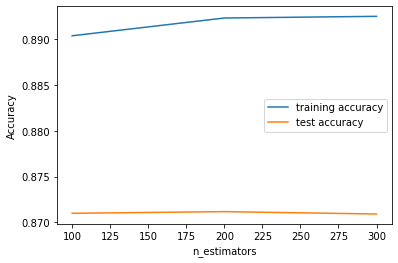

In [117]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_n_estimators"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


we can that best ```n_estimtor``` is between ```200 t0 300```

# Tunning min_sample_leaf 

In [134]:
#number of fold
n_folds = 3#5

#parameters the model build on
parameters = {"min_samples_leaf": range(100,400,50)}

rf = RandomForestClassifier()

rf = GridSearchCV(rf,parameters,
                cv = n_folds,
                 scoring="accuracy",
                  n_jobs=-1,
                  verbose=3,
                 return_train_score = True)
rf.fit(X_train_pca_rf,y_train_pca_rf)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  18 | elapsed:   15.7s remaining:  2.1min
[Parallel(n_jobs=-1)]: Done   9 out of  18 | elapsed:   18.0s remaining:   18.0s
[Parallel(n_jobs=-1)]: Done  16 out of  18 | elapsed:   26.5s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:   26.6s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy', verbose=3)

In [135]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,16.31,0.17,0.17,0.01,100,{'min_samples_leaf': 100},0.85,0.87,0.86,0.86,0.01,1,0.87,0.87,0.87,0.87,0.00
1,15.57,0.47,0.18,0.01,150,{'min_samples_leaf': 150},0.84,0.86,0.85,0.85,0.01,2,0.86,0.85,0.86,0.86,0.00
2,14.69,0.12,0.19,0.02,200,{'min_samples_leaf': 200},0.84,0.85,0.84,0.84,0.01,3,0.86,0.85,0.85,0.85,0.00
3,13.60,0.05,0.14,0.00,250,{'min_samples_leaf': 250},0.83,0.85,0.84,0.84,0.01,4,0.85,0.84,0.85,0.85,0.00
4,10.18,0.15,0.11,0.01,300,{'min_samples_leaf': 300},0.83,0.85,0.84,0.84,0.01,5,0.85,0.84,0.84,0.84,0.00


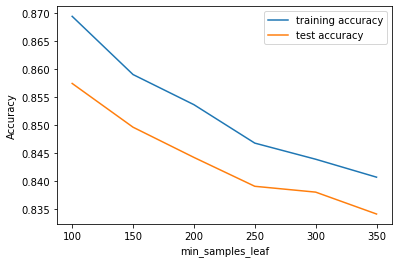

In [136]:
#plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


we can see  best ```min_samples_leaf``` are between 100 t0 300 

# Max Features

In [121]:
# GridSearchCV to find optimal max_features


# specify number of folds for k-fold CV
n_folds = 3#5

# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}

# instantiate the model
rf = RandomForestClassifier(max_depth=8)


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",
                  n_jobs=-1,
                  verbose=3,
                  return_train_score=True)
rf.fit(X_train_pca_rf, y_train_pca_rf)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed:   36.2s remaining:   54.4s
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed:  1.9min remaining:   28.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(max_depth=8), n_jobs=-1,
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [122]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,18.28,0.42,0.34,0.01,4,{'max_features': 4},0.86,0.88,0.87,0.87,0.01,5,0.89,0.89,0.89,0.89,0.00
1,34.86,0.46,0.35,0.01,8,{'max_features': 8},0.87,0.88,0.87,0.87,0.00,4,0.89,0.89,0.89,0.89,0.00
2,57.67,0.26,0.31,0.02,14,{'max_features': 14},0.87,0.88,0.87,0.87,0.00,3,0.90,0.89,0.89,0.89,0.00
3,79.50,0.86,0.34,0.02,20,{'max_features': 20},0.87,0.88,0.87,0.88,0.00,2,0.90,0.89,0.90,0.90,0.00
4,89.84,2.85,0.24,0.05,24,{'max_features': 24},0.87,0.88,0.87,0.88,0.01,1,0.90,0.89,0.90,0.90,0.00


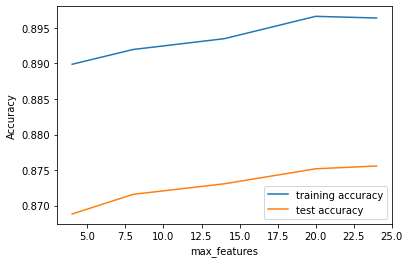

In [123]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_features"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


we can see best ```max_features``` are between 7 to 12

# Grid Search To Find Optimal HyperParameters

In [125]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,12],
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10,15]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 3)
grid_search.fit(X_train_pca_rf,y_train_pca_rf)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 28.2min
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed: 65.9min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed: 108.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 12], 'max_features': [5, 10, 15],
                         'min_samples_leaf': range(100, 400, 100),
                         'min_samples_split': range(200, 500, 100),
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [126]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8587626888847438 using {'max_depth': 12, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


we get a accuracy of 85.87% using following parameter values:

- `max_depth` : 12
- `max_features` : 10
- `min_samples_leaf` : 100
- `min_samples_split` : 200
- `n_estimators` : 300

In [201]:
#number of folds
n_folds = 5

#rf = RandomForestClassifier()

#final RandomForestClasssifier model with all parameters
final_rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200,
                                 n_jobs = -1,verbose = 3 ,
                                  class_weight="balanced",
                                  random_state=100)


In [202]:
#fittingbthe model on the final model built 
final_rfc.fit(X_train_pca_rf,y_train_pca_rf)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200
building tree 3 of 200

building tree 4 of 200building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200

building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    8.9s


building tree 120 of 200
building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   16.6s finished


RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=10,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=200, n_jobs=-1, random_state=100,
                       verbose=3)

In [203]:
# predictions  on the train data
predictions = final_rfc.predict_proba(X_train_pca_rf)[:,1]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.2s finished


In [205]:
#predited array values
predictions

array([0.33692605, 0.04212457, 0.18612082, ..., 0.72811967, 0.87256796,
       0.81610968])

In [206]:
#creating data frame and a column 
y_train_pred_rf_final = pd.DataFrame({'Churn':y_train_pca_rf.values, 'Churn_Prob':predictions})
y_train_pred_rf_final['CustID'] = y_train_pca_rf.index
y_train_pred_rf_final.head()

,Churn,Churn_Prob,CustID
0,0,0.34,0
1,0,0.04,1
2,0,0.19,2
3,0,0.13,3
4,0,0.17,4


In [207]:
y_train_pred_rf_final['predicted'] = y_train_pred_rf_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_rf_final.head()


,Churn,Churn_Prob,CustID,predicted
0,0,0.34,0,0
1,0,0.04,1,0
2,0,0.19,2,0
3,0,0.13,3,0
4,0,0.17,4,0


In [208]:
#calling the evalution metric code to see the performance on the train data after deciding a cutoff value
evaluation_metric(y_train_pred_rf_final.Churn,y_train_pred_rf_final.predicted,y_train_pred_rf_final.Churn_Prob)

Recall/Sensitivity : 0.8598
confusion metrics :
 [[17027  2157]
 [ 2690 16494]]
Accuracy of model 
 0.8736707673060884
AUC Score : 0.9465


In [210]:
metrics(y_train_pred_rf_final.Churn,y_train_pred_rf_final.predicted)

Sensitivity : 0.8598
Specificity : 0.8876
FPR : 0.1124
Positive predictive value : 0.8843
Negative predictive value : 0.8636


```Recall/Sensitivity``` on the train data  : 85.77%

```Specificity``` on the train data  : 88.7%

```Accuracy``` on the train data : 87.23%

### Plotting ROC Curve

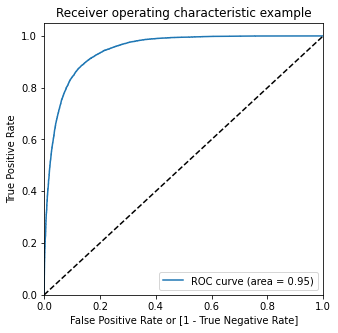

In [211]:
# calling the ROC curve
draw_roc(y_train_pred_rf_final.Churn, y_train_pred_rf_final.Churn_Prob)

the area under the curve is high and ROC Area is 0.87 hence we can go with the model

### FInding Optimal Cutoff

In [212]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_rf_final[i]= y_train_pred_rf_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_rf_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.34,0,0,1,1,1,1,0,0,0,0,0,0
1,0,0.04,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.19,2,0,1,1,0,0,0,0,0,0,0,0
3,0,0.13,3,0,1,1,0,0,0,0,0,0,0,0
4,0,0.17,4,0,1,1,0,0,0,0,0,0,0,0


In [213]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_rf_final.Churn, y_train_pred_rf_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.50   1.00   0.00
0.10  0.10      0.55   1.00   0.10
0.20  0.20      0.73   1.00   0.45
0.30  0.30      0.84   0.97   0.70
0.40  0.40      0.87   0.92   0.82
0.50  0.50      0.87   0.86   0.89
0.60  0.60      0.85   0.78   0.93
0.70  0.70      0.81   0.66   0.96
0.80  0.80      0.74   0.49   0.98
0.90  0.90      0.58   0.16   1.00


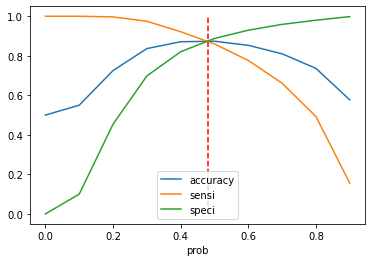

In [214]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.48, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

### From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

In [215]:
# Final cutoff points and predictions by the model 
y_train_pred_rf_final['final_predicted'] = y_train_pred_rf_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_rf_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.34,0,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.04,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.19,2,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.13,3,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.17,4,0,1,1,0,0,0,0,0,0,0,0,0


In [217]:
# Let's check the overall accuracy on the train data after the cutoff value decided.
accuracy_score(y_train_pred_rf_final.Churn, y_train_pred_rf_final.final_predicted)

0.86793682235196

In [219]:
#checking the performance
evaluation_metric(y_train_pred_rf_final.Churn, y_train_pred_rf_final.final_predicted ,y_train_pred_rf_final.Churn_Prob)

Recall/Sensitivity : 0.9321
confusion metrics :
 [[15419  3765]
 [ 1302 17882]]
Accuracy of model 
 0.86793682235196
AUC Score : 0.9465


In [220]:
# calling for confudion matrix
metrics(y_train_pred_rf_final.Churn, y_train_pred_rf_final.final_predicted)

Sensitivity : 0.9321
Specificity : 0.8037
FPR : 0.1963
Positive predictive value : 0.8261
Negative predictive value : 0.9221


```Recall/Sensitivity``` on the train data after deciding the cutoff : 93.21%

```Specificity``` on the train data after deciding the cutoff : 80.37%

```Accuracy``` on the train data after deciding the cutoff: 86.84%

### Predictions on the testset

In [221]:
# predicts the churn probability for test data
y_test_pred_rf_prob =  final_rfc.predict_proba(X_test_pca_rf)[:,1]

y_test_pred_rf_final = pd.DataFrame({'Churn':y_test_pca_rf.values, 'Churn_Prob':y_test_pred_rf_prob})
y_test_pred_rf_final['CustID'] = y_test_pca_rf.index
y_test_pred_rf_final.head()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished


,Churn,Churn_Prob,CustID
0,0,0.79,7000452524
1,0,0.57,7001703821
2,0,0.15,7001414526
3,0,0.21,7002087709
4,0,0.13,7000903521


In [222]:
# FInal cutoff points and predictions by the model
y_test_pred_rf_final['final_predicted'] = y_test_pred_rf_final.Churn_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_test_pred_rf_final.head()

,Churn,Churn_Prob,CustID,final_predicted
0,0,0.79,7000452524,1
1,0,0.57,7001703821,1
2,0,0.15,7001414526,0
3,0,0.21,7002087709,0
4,0,0.13,7000903521,0


In [223]:
#checking the performance on the test data
evaluation_metric(y_test_pred_rf_final.Churn,y_test_pred_rf_final.final_predicted,y_test_pred_rf_final.Churn_Prob)

Recall/Sensitivity : 0.8584
confusion metrics :
 [[6506 1728]
 [ 109  661]]
Accuracy of model 
 0.7959795646379387
AUC Score : 0.8991


In [224]:
#checkingbthe performance mterics on the test data
metrics(y_test_pred_rf_final.Churn, y_test_pred_rf_final.final_predicted)

Sensitivity : 0.8584
Specificity : 0.7901
FPR : 0.2099
Positive predictive value : 0.2767
Negative predictive value : 0.9835


```Recall/Sensitivity``` on the train data after deciding the cutoff : 93.07%

```Specificity``` on the train data after deciding the cutoff : 80.62%

```Accuracy``` on the train data after deciding the cutoff: 86.84%

```Recall/Sensitivity``` on the test data after deciding the cutoff : 85.82%

```Specificity``` on the test data after deciding the cutoff : 79.01%

```Accuracy``` on the test data after deciding the cutoff: 79.58%

###  SVM

In [107]:
# creating copies for the pca transformed variables 
X_train_pca_svm = df_train_pca.copy()
y_train_pca_svm = y_train_res.copy()

X_test_pca_svm = df_test_pca.copy()
y_test_pca_svm = y_test.copy()


In [108]:
# creating svc object
svc = SVC()

# fitting model on svc
svc.fit(X_train_pca_svm,y_train_pca_svm)

SVC()

In [109]:
# predicting the values of y_train
y_train_pred_svc = svc.predict(X_train_pca_svm)
y_train_pred_svc

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [110]:
#checking the performance the following metrics
print ("Recall/Sensitivity : %.4g" % recall_score(y_train_pca_svm, y_train_pred_svc))
print('confusion metrics :\n' , confusion_matrix(y_train_pca_svm, y_train_pred_svc))
print('Accuracy of model \n',accuracy_score(y_train_pca_svm, y_train_pred_svc))


Recall/Sensitivity : 0.9735
confusion metrics :
 [[17773  1411]
 [  508 18676]]
Accuracy of model 
 0.9499843619683069


```Recall/Sensitivity``` on the train : 97.35%

```Accuracy``` on the train data : 94.99%

In [111]:
# predicting the values of y_test
y_test_pred_svc = svc.predict(X_test_pca_svm)
y_test_pred_svc

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [112]:
print ("Recall/Sensitivity : %.4g" % recall_score(y_test_pca_svm, y_test_pred_svc))
print('confusion metrics :\n' , confusion_matrix(y_test_pca_svm, y_test_pred_svc))
print('Accuracy of model \n',accuracy_score(y_test_pca_svm, y_test_pred_svc))

Recall/Sensitivity : 0.7545
confusion metrics :
 [[7529  705]
 [ 189  581]]
Accuracy of model 
 0.9007107952021324


with default parameters we got some good accuracy and recall but we got less in the testset it means model is overfitting  lets look at some hyperparameter tuning

In [113]:
# paraneter tuning with non linear kernal
# specify range of parameters (C) as a list
params = {"C": [0.1, 1, 10, 100, 1000]}

svm1 = SVC(probability=True)

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'f1', 
                        cv = 5, 
                        verbose = 3,
                        n_jobs=-1,
                       return_train_score=True) 
model_cv.fit(X_train_pca_svm, y_train_pca_svm)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  11 out of  25 | elapsed: 11.8min remaining: 15.1min
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed: 26.3min remaining:  6.6min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 30.6min finished


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000]}, return_train_score=True,
             scoring='f1', verbose=3)

In [114]:
#score of the modle
scores = model_cv.cv_results_

In [115]:
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,612.78,9.85,15.47,0.39,0.10,{'C': 0.1},0.86,0.88,0.89,0.89,0.88,0.88,0.01,5,0.89,0.89,0.88,0.88,0.89,0.89,0.00
1,499.72,15.07,11.61,0.40,1,{'C': 1},0.93,0.94,0.94,0.94,0.94,0.94,0.01,4,0.95,0.95,0.95,0.95,0.95,0.95,0.00
2,725.80,24.75,6.97,0.57,10,{'C': 10},0.96,0.97,0.97,0.97,0.96,0.97,0.00,3,0.98,0.98,0.98,0.98,0.98,0.98,0.00
3,873.29,43.58,2.61,0.25,100,{'C': 100},0.97,0.97,0.98,0.97,0.97,0.97,0.00,1,1.00,1.00,1.00,1.00,1.00,1.00,0.00
4,807.07,135.27,1.86,0.15,1000,{'C': 1000},0.96,0.97,0.97,0.97,0.97,0.97,0.00,2,1.00,1.00,1.00,1.00,1.00,1.00,0.00


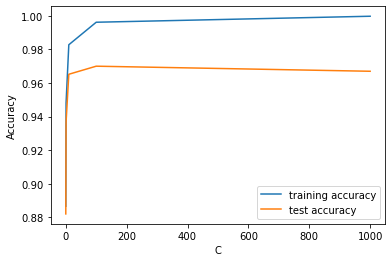

In [116]:
# plotting accuracies with C
plt.figure()
plt.plot(scores["param_C"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [117]:
# best params 
model_cv.best_params_

{'C': 100}

we are choosing the C = 0.1 because as c increases the model is overfitting 

In [119]:
# fitting the final model
svc_final = SVC(C=0.1,kernel='rbf',probability=True)
svc_final.fit(X_train_pca_svm,y_train_pca_svm)

SVC(C=0.1, probability=True)

In [120]:
# predicting the values of y_train
y_train_pred_svc_final_prob = svc_final.predict_proba(X_train_pca_svm)[:,1]
y_train_pred_svc_final_prob

array([0.21934232, 0.00691392, 0.2193127 , ..., 0.89090195, 0.96745029,
       0.97472641])

In [151]:
print("AUC Score : %.4g" %roc_auc_score(y_train_pca_svm, y_train_pred_svc_final_prob))


AUC Score : 0.9517


In [152]:
# predicts the churn probability for train data
#y_train_pred_logreg_prob = logreg_model.predict_proba(X_train_pca_logreg)[:,1]

y_train_pred_svm_final = pd.DataFrame({'Churn':y_train_pca_svm.values, 'Churn_Prob':y_train_pred_svc_final_prob})
y_train_pred_svm_final['CustID'] = y_train_pca_svm.index
y_train_pred_svm_final.head()

,Churn,Churn_Prob,CustID
0,0,0.22,0
1,0,0.01,1
2,0,0.22,2
3,0,0.06,3
4,0,0.08,4


In [153]:
# predicting churn for train data
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_svm_final['predicted'] = y_train_pred_svm_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_svm_final.head()


,Churn,Churn_Prob,CustID,predicted
0,0,0.22,0,0
1,0,0.01,1,0
2,0,0.22,2,0
3,0,0.06,3,0
4,0,0.08,4,0


In [154]:
#y_train_pred_logreg

In [156]:
# cllaing the evalution metrics to check the performance on the train data
evaluation_metric(y_train_pred_svm_final.Churn, y_train_pred_svm_final.predicted, y_train_pred_svm_final.Churn_Prob)

Recall/Sensitivity : 0.8898
confusion metrics :
 [[17196  1988]
 [ 2115 17069]]
Accuracy of model 
 0.8930619266055045
AUC Score : 0.9517


In [157]:
#confusion matrix
metrics(y_train_pred_svm_final.Churn, y_train_pred_svm_final.predicted)

Sensitivity : 0.8898
Specificity : 0.8964
FPR : 0.1036
Positive predictive value : 0.8957
Negative predictive value : 0.8905


#### Plotting ROC Curve

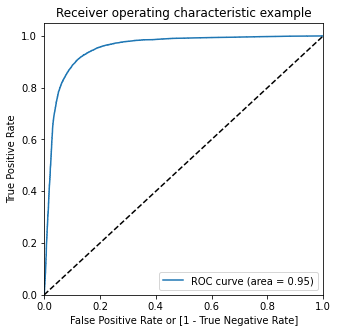

In [158]:
#roc curve
draw_roc(y_train_pred_svm_final.Churn, y_train_pred_svm_final.Churn_Prob)

#### FInding Optimal Cutoff

In [159]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_svm_final[i]= y_train_pred_svm_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_svm_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.22,0,0,1,1,1,0,0,0,0,0,0,0
1,0,0.01,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.22,2,0,1,1,1,0,0,0,0,0,0,0
3,0,0.06,3,0,1,0,0,0,0,0,0,0,0,0
4,0,0.08,4,0,1,0,0,0,0,0,0,0,0,0


In [162]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_svm_final.Churn, y_train_pred_svm_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.50   1.00   0.00
0.10  0.10      0.82   0.98   0.65
0.20  0.20      0.87   0.96   0.78
0.30  0.30      0.89   0.94   0.84
0.40  0.40      0.89   0.92   0.87
0.50  0.50      0.89   0.89   0.90
0.60  0.60      0.89   0.86   0.91
0.70  0.70      0.88   0.83   0.93
0.80  0.80      0.87   0.79   0.95
0.90  0.90      0.82   0.67   0.97


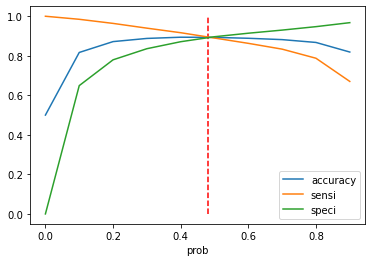

In [163]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.48, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

From the curve above, 0.53 is the optimum point but we are taking 0.25 as cutoff since we have interested in predicting the Churn customers correctly

In [164]:
# deciding final cutoff point based on the bussiness requirement and prediction by the model
y_train_pred_svm_final['final_predicted'] = y_train_pred_svm_final.Churn_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_svm_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.22,0,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.01,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.22,2,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.06,3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.08,4,0,1,0,0,0,0,0,0,0,0,0,0


In [170]:
#performance on the train data
evaluation_metric(y_train_pred_svm_final.Churn,y_train_pred_svm_final.final_predicted,y_train_pred_svm_final.Churn_Prob)

Recall/Sensitivity : 0.9518
confusion metrics :
 [[15606  3578]
 [  924 18260]]
Accuracy of model 
 0.882662635529608
AUC Score : 0.9517


In [171]:
#confusion matrix results
metrics(y_train_pred_svm_final.Churn, y_train_pred_svm_final.final_predicted)

Sensitivity : 0.9518
Specificity : 0.8135
FPR : 0.1865
Positive predictive value : 0.8362
Negative predictive value : 0.9441


### Predictions on the testset

In [172]:
# predicts the churn probability for train data
y_test_pred_svm_prob = svc_final.predict_proba(X_test_pca_svm)[:,1]

y_test_pred_svm_final = pd.DataFrame({'Churn':y_test_pca_svm.values, 'Churn_Prob':y_test_pred_svm_prob})
y_test_pred_svm_final['CustID'] = y_test_pca_svm.index
y_test_pred_svm_final.head()

,Churn,Churn_Prob,CustID
0,0,0.86,7000452524
1,0,0.24,7001703821
2,0,0.02,7001414526
3,0,0.10,7002087709
4,0,0.05,7000903521


In [173]:
# earlier decided final cutoff point and predictions by the model on the test data
y_test_pred_svm_final['final_predicted'] = y_test_pred_svm_final.Churn_Prob.map( lambda x: 1 if x > 0.25 else 0)

y_test_pred_svm_final.head()

,Churn,Churn_Prob,CustID,final_predicted
0,0,0.86,7000452524,1
1,0,0.24,7001703821,0
2,0,0.02,7001414526,0
3,0,0.10,7002087709,0
4,0,0.05,7000903521,0


In [174]:
# performance of the model on the test data
evaluation_metric(y_test_pred_svm_final.Churn, y_test_pred_svm_final.final_predicted, y_test_pred_svm_final.Churn_Prob)

Recall/Sensitivity : 0.8818
confusion metrics :
 [[6668 1566]
 [  91  679]]
Accuracy of model 
 0.815970679697912
AUC Score : 0.9144


In [175]:
# confusion matrix for the test data
metrics(y_test_pred_svm_final.Churn, y_test_pred_svm_final.final_predicted)

Sensitivity : 0.8818
Specificity : 0.8098
FPR : 0.1902
Positive predictive value : 0.3024
Negative predictive value : 0.9865


```Recall/Sensitivity``` on the train data after deciding the cutoff : 95.18%

```Specificity``` on the train data after deciding the cutoff : 81.35%

```Accuracy``` on the train data after deciding the cutoff: 88.26%

```Recall/Sensitivity``` on the test data after deciding the cutoff : 88.187%

```Specificity``` on the test data after deciding the cutoff : 80.98%

```Accuracy``` on the test data after deciding the cutoff: 81.59%

# Logistic With RFE

In [225]:
# importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [226]:
# creating LogisticRegression() object and using that object for predictions
lr = LogisticRegression(max_iter=500)
# RFE is the RECURSIVE FEATURE ELIMINATION
rfe = RFE(lr,n_features_to_select=25)
# above we have selected top 25 significant variables 
rfe = rfe.fit(X_train_res,y_train_res)

In [227]:
list(zip(X_train_res.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 26),
 ('arpu_7', False, 6),
 ('arpu_8', False, 21),
 ('onnet_mou_6', False, 31),
 ('onnet_mou_8', False, 76),
 ('offnet_mou_6', False, 34),
 ('offnet_mou_7', False, 55),
 ('offnet_mou_8', False, 59),
 ('roam_ic_mou_6', False, 49),
 ('roam_ic_mou_7', False, 67),
 ('roam_ic_mou_8', False, 71),
 ('roam_og_mou_6', False, 36),
 ('roam_og_mou_7', False, 42),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_6', False, 40),
 ('loc_og_t2t_mou_7', False, 7),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 80),
 ('loc_og_t2m_mou_7', False, 22),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 77),
 ('loc_og_t2f_mou_7', False, 23),
 ('loc_og_t2f_mou_8', False, 73),
 ('loc_og_t2c_mou_8', False, 83),
 ('loc_og_mou_6', False, 32),
 ('loc_og_mou_7', True, 1),
 ('loc_og_mou_8', True, 1),
 ('std_og_t2t_mou_6', False, 35),
 ('std_og_t2t_mou_7', False, 66),
 ('std_og_t2t_mou_8', True, 1),
 ('std_og_t2m_mou_6', False, 33),
 ('std_og_t2m_mou_7', False, 10),
 ('std_o

In [228]:
# displaying the columns whcih have the RFE support
X_train_res.columns[rfe.support_]

Index(['roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_7',
       'std_og_mou_8', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8',
       'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'aon', 'sep_vbc_3g',
       'avg_good_phase_rech_amt'],
      dtype='object')

In [229]:
# selecting only the significsnt features and storing in X_train_RFE variable
X_train_RFE = X_train_res[X_train_res.columns[rfe.support_]]
X_train_RFE.head()

,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_8,std_og_t2m_mou_8,std_og_mou_7,std_og_mou_8,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,vol_2g_mb_8,vol_3g_mb_8,aon,sep_vbc_3g,avg_good_phase_rech_amt
0,-0.36,-0.65,-0.92,-0.99,-0.92,1.06,-0.24,0.51,0.43,-0.06,-0.13,-0.80,-0.96,-0.58,-0.99,-0.53,-0.37,-0.28,2.10,-0.89,-0.40,-0.45,-0.96,-0.27,-0.72
1,-0.36,0.75,-0.26,-0.45,0.24,-0.54,-0.59,-0.78,-0.70,-0.99,-0.54,-0.23,0.75,3.14,1.12,0.06,0.76,-0.28,-0.91,1.44,0.09,0.09,-0.19,2.64,-0.71
2,-0.36,0.22,1.57,1.40,1.05,-0.54,-0.59,-0.75,-0.70,-0.06,-0.16,-0.14,0.27,-0.51,0.03,2.58,1.98,-0.28,0.73,-0.40,-0.40,-0.45,1.09,-0.27,-0.18
3,-0.36,0.46,-0.24,1.29,-0.07,-0.53,2.29,0.14,0.88,0.69,0.66,-0.77,-0.90,-0.22,-0.91,-0.81,-0.76,-0.28,0.87,-0.43,-0.40,-0.45,1.44,-0.27,-0.13
4,-0.36,-0.53,-0.38,-0.47,-0.47,-0.37,-0.29,0.03,-0.43,-0.27,-0.66,-0.32,0.08,-0.58,-0.15,-0.23,-0.15,3.78,0.32,-0.64,-0.40,-0.45,-0.87,-0.27,0.12


In [230]:
# function for creating model using  statsmodel and calculation of the VIF 
def lr_model(X,y):
    X = X.drop(['const'],axis=1,errors='ignore')
    
    X = sm.add_constant(X)# adding const
    #lm = sm.OLS(y,X).fit() # fitting the model 
    lm = sm.GLM(y,X, family = sm.families.Binomial()).fit()
    print(lm.summary())
    vif = pd.DataFrame()
    #X = X.drop(['const'],axis=1)
    X_vif = X
    vif['Features'] = X_vif.columns
    vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    return X,lm


## Model - 1 

In [231]:
y_train = y_train_res

In [232]:
# calling the model building function 
X_train_RFE_new,lm = lr_model(X_train_RFE,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38342
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13996.
Date:                Mon, 31 Aug 2020   Deviance:                       27992.
Time:                        20:48:43   Pearson chi2:                 6.01e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [233]:
y_train_pred = lm.predict(X_train_RFE_new).values.reshape(-1)

#### Creating Dataframe

In [234]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Churn,Churn_Prob,CustID
0,0,0.32,0
1,0,0.00,1
2,0,0.02,2
3,0,0.09,3
4,0,0.16,4


In [235]:
# creating new column predicted churn if churn prob > 0.5
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.32,0,0
1,0,0.00,1,0
2,0,0.02,2,0
3,0,0.09,3,0
4,0,0.16,4,0


In [237]:
# metrics
evaluation_metric(y_train_pred_final.Churn,y_train_pred_final.predicted,y_train_pred_final.Churn_Prob)

Recall/Sensitivity : 0.8569
confusion metrics :
 [[16158  3026]
 [ 2745 16439]]
Accuracy of model 
 0.849588198498749
AUC Score : 0.918


since we have multicollineaarity in the model so we are remooving the high correlated variables 

In [238]:
# dropping the variable three
X_train_RFE_new = X_train_RFE_new.drop(['std_og_mou_8'],axis=1)

## Model - 2

In [239]:
# calling the model building function 
X_train_RFE_new,lm = lr_model(X_train_RFE_new,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38343
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14064.
Date:                Mon, 31 Aug 2020   Deviance:                       28128.
Time:                        20:48:58   Pearson chi2:                 6.54e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [240]:
y_train_pred_final['Churn_Prob'] = lm.predict(X_train_RFE_new).values.reshape(-1)
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.30,0,0
1,0,0.00,1,0
2,0,0.01,2,0
3,0,0.09,3,0
4,0,0.16,4,0


In [241]:
# metrics
evaluation_metric(y_train_pred_final.Churn,y_train_pred_final.predicted,y_train_pred_final.Churn_Prob)

Recall/Sensitivity : 0.857
confusion metrics :
 [[16127  3057]
 [ 2744 16440]]
Accuracy of model 
 0.848806296914095
AUC Score : 0.9168


In [242]:
# dropping the variable three
X_train_RFE_new = X_train_RFE_new.drop(['total_og_mou_7'],axis=1)

## Model - 3

In [243]:
# calling the model building function 
X_train_RFE_new,lm = lr_model(X_train_RFE_new,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38344
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14066.
Date:                Mon, 31 Aug 2020   Deviance:                       28132.
Time:                        20:49:12   Pearson chi2:                 6.48e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [244]:
y_train_pred_final['Churn_Prob'] = lm.predict(X_train_RFE_new).values.reshape(-1)
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.30,0,0
1,0,0.00,1,0
2,0,0.01,2,0
3,0,0.09,3,0
4,0,0.16,4,0


In [245]:
# metrics
evaluation_metric(y_train_pred_final.Churn,y_train_pred_final.predicted,y_train_pred_final.Churn_Prob)

Recall/Sensitivity : 0.8571
confusion metrics :
 [[16128  3056]
 [ 2741 16443]]
Accuracy of model 
 0.8489105504587156
AUC Score : 0.9168


In [246]:
# dropping the variable loc_og_mou_8
X_train_RFE_new = X_train_RFE_new.drop(['loc_og_mou_8'],axis=1)

## Model - 4

In [247]:
# calling the model building function 
X_train_RFE_new,lm = lr_model(X_train_RFE_new,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38345
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14092.
Date:                Mon, 31 Aug 2020   Deviance:                       28183.
Time:                        20:49:14   Pearson chi2:                 6.41e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [248]:
y_train_pred_final['Churn_Prob'] = lm.predict(X_train_RFE_new).values.reshape(-1)
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.30,0,0
1,0,0.00,1,0
2,0,0.02,2,0
3,0,0.10,3,0
4,0,0.15,4,0


In [249]:
# metrics
evaluation_metric(y_train_pred_final.Churn,y_train_pred_final.predicted,y_train_pred_final.Churn_Prob)

Recall/Sensitivity : 0.8563
confusion metrics :
 [[16126  3058]
 [ 2757 16427]]
Accuracy of model 
 0.8484414095079232
AUC Score : 0.9165


In [250]:
# dropping the variable std_og_mou_8
X_train_RFE_new = X_train_RFE_new.drop(['loc_ic_mou_8'],axis=1)

## Model - 5

In [251]:
# calling the model building function 
X_train_RFE_new,lm = lr_model(X_train_RFE_new,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38346
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14170.
Date:                Mon, 31 Aug 2020   Deviance:                       28339.
Time:                        20:49:16   Pearson chi2:                 6.62e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [252]:
y_train_pred_final['Churn_Prob'] = lm.predict(X_train_RFE_new).values.reshape(-1)
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.32,0,0
1,0,0.00,1,0
2,0,0.02,2,0
3,0,0.09,3,0
4,0,0.16,4,0


In [253]:
# metrics
evaluation_metric(y_train_pred_final.Churn,y_train_pred_final.predicted,y_train_pred_final.Churn_Prob)

Recall/Sensitivity : 0.8575
confusion metrics :
 [[16062  3122]
 [ 2733 16451]]
Accuracy of model 
 0.8473988740617181
AUC Score : 0.9154


In [254]:
# dropping the variable loc_og_t2t_mou_8
X_train_RFE_new = X_train_RFE_new.drop(['total_og_mou_8'],axis=1)

## Model - 6

In [255]:
# calling the model building function 
X_train_RFE_new,lm = lr_model(X_train_RFE_new,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38347
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14176.
Date:                Mon, 31 Aug 2020   Deviance:                       28352.
Time:                        20:49:18   Pearson chi2:                 6.46e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [256]:
y_train_pred_final['Churn_Prob'] = lm.predict(X_train_RFE_new).values.reshape(-1)
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.31,0,0
1,0,0.00,1,0
2,0,0.02,2,0
3,0,0.09,3,0
4,0,0.16,4,0


In [257]:
# metrics
evaluation_metric(y_train_pred_final.Churn,y_train_pred_final.predicted,y_train_pred_final.Churn_Prob)

Recall/Sensitivity : 0.8587
confusion metrics :
 [[16058  3126]
 [ 2711 16473]]
Accuracy of model 
 0.8478680150125104
AUC Score : 0.9153


In [258]:
# dropping the variable loc_og_t2m_mou_8
X_train_RFE_new = X_train_RFE_new.drop(['total_ic_mou_8'],axis=1)

## Model - 7

In [259]:
# calling the model building function 
X_train_RFE_new,lm = lr_model(X_train_RFE_new,y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                38368
Model:                            GLM   Df Residuals:                    38348
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14422.
Date:                Mon, 31 Aug 2020   Deviance:                       28844.
Time:                        20:49:19   Pearson chi2:                 8.15e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [260]:
y_train_pred_final['Churn_Prob'] = lm.predict(X_train_RFE_new).values.reshape(-1)
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.43,0,0
1,0,0.00,1,0
2,0,0.11,2,0
3,0,0.11,3,0
4,0,0.16,4,0


In [261]:
# metrics
evaluation_metric(y_train_pred_final.Churn,y_train_pred_final.predicted,y_train_pred_final.Churn_Prob)

Recall/Sensitivity : 0.858
confusion metrics :
 [[15962  3222]
 [ 2724 16460]]
Accuracy of model 
 0.8450271059216014
AUC Score : 0.9118


Now we have all the models VIF with < 5 and accuracy of 84 and AUC is 91 and sensitivity/recall is 85 which means we have a good model

### Plotting ROC Curve

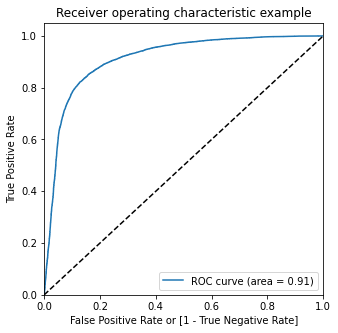

In [262]:
draw_roc(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

In [263]:
# finding Optimal cutoff
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.43,0,0,1,1,1,1,1,0,0,0,0,0
1,0,0.00,1,0,1,0,0,0,0,0,0,0,0,0
2,0,0.11,2,0,1,1,0,0,0,0,0,0,0,0
3,0,0.11,3,0,1,1,0,0,0,0,0,0,0,0
4,0,0.16,4,0,1,1,0,0,0,0,0,0,0,0


In [264]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
#from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.50   1.00   0.00
0.10  0.10      0.72   0.98   0.46
0.20  0.20      0.78   0.95   0.61
0.30  0.30      0.82   0.92   0.71
0.40  0.40      0.84   0.89   0.78
0.50  0.50      0.85   0.86   0.83
0.60  0.60      0.85   0.82   0.87
0.70  0.70      0.83   0.76   0.91
0.80  0.80      0.80   0.67   0.94
0.90  0.90      0.64   0.31   0.97


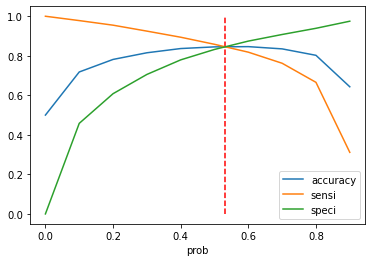

In [265]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.53, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

Since we need sensitivity of the model hence take .4 as cutoff

In [266]:
# FInal cutoff points and predictions by the model
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.43,0,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.00,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.11,2,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.11,3,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.16,4,0,1,1,0,0,0,0,0,0,0,0,0


In [267]:
evaluation_metric(y_train_pred_final.Churn, y_train_pred_final.final_predicted, y_train_pred_final.Churn_Prob)

Recall/Sensitivity : 0.8939
confusion metrics :
 [[14950  4234]
 [ 2036 17148]]
Accuracy of model 
 0.8365825688073395
AUC Score : 0.9118


In [268]:
metrics(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

Sensitivity : 0.8939
Specificity : 0.7793
FPR : 0.2207
Positive predictive value : 0.802
Negative predictive value : 0.8801


### Predictions on the testset

In [269]:
# FInal cutoff points and predictions by the model
# adding constant
X_test = sm.add_constant(X_test)
X_test_RFE = X_test[X_train_RFE_new.columns]# predicts the churn probability for train data
y_test_pred_prob =  lm.predict(X_test_RFE).values.reshape(-1)

y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred_prob})
y_test_pred_final['CustID'] = y_test.index
y_test_pred_final.head()

# FInal cutoff points and predictions by the model
y_test_pred_final['final_predicted'] = y_test_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_test_pred_logreg_final.head()

,Churn,Churn_Prob,CustID,final_predicted
0,0,0.85,7000452524,1
1,0,0.61,7001703821,1
2,0,0.04,7001414526,0
3,0,0.17,7002087709,0
4,0,0.13,7000903521,0


In [270]:
evaluation_metric(y_test_pred_final.Churn,y_test_pred_final.final_predicted,y_test_pred_final.Churn_Prob)

Recall/Sensitivity : 0.8857
confusion metrics :
 [[6391 1843]
 [  88  682]]
Accuracy of model 
 0.7855397601066193
AUC Score : 0.9084


In [271]:
metrics(y_test_pred_final.Churn,y_test_pred_final.final_predicted)

Sensitivity : 0.8857
Specificity : 0.7762
FPR : 0.2238
Positive predictive value : 0.2701
Negative predictive value : 0.9864


#### Finding Top Predictor variables 

In [272]:
lm.params

const                     -1.84
roam_og_mou_8              0.26
loc_og_t2t_mou_8          -0.52
loc_og_t2m_mou_8          -0.66
loc_og_mou_7               0.12
std_og_t2t_mou_8          -0.47
std_og_t2m_mou_8          -0.45
std_og_mou_7               0.18
loc_ic_t2t_mou_8          -0.21
loc_ic_t2m_mou_8          -0.36
loc_ic_t2f_mou_8          -0.41
total_ic_mou_7             0.04
spl_ic_mou_8              -0.55
total_rech_num_8          -0.52
last_day_rch_amt_8        -0.77
vol_2g_mb_8               -0.50
vol_3g_mb_8               -0.42
aon                       -0.39
sep_vbc_3g                -0.86
avg_good_phase_rech_amt    0.48
dtype: float64

AxesSubplot(0.125,0.125;0.775x0.755)


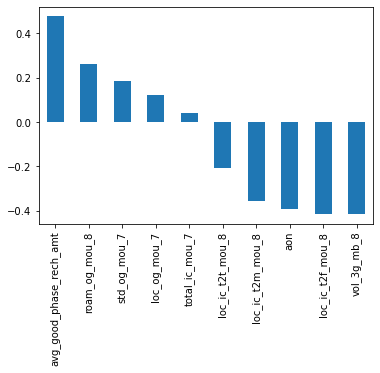

In [273]:
# for getting the coef values 
coef_val = [val for val in lm.params]
# To get the weights of all the variables
weights = pd.Series(coef_val,
                 index=X_train_RFE_new.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


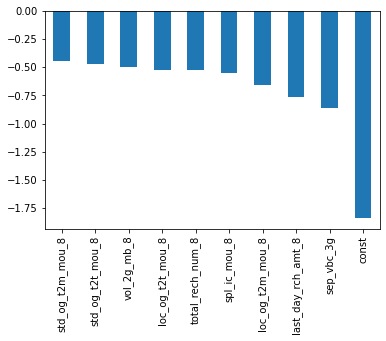

In [274]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [275]:
# for getting the coef values 

coef_abs_val = [abs(val) for val in lm.params]
# To get the weights of all the variables
weights_df = pd.DataFrame(coef_abs_val,columns=['Coef'],index=X_train_RFE_new.columns)
weights_df['Org_coef'] = coef_val
weights_df = weights_df.sort_values('Coef',ascending=False)
weights_df

,Coef,Org_coef
const,1.84,-1.84
sep_vbc_3g,0.86,-0.86
last_day_rch_amt_8,0.77,-0.77
loc_og_t2m_mou_8,0.66,-0.66
spl_ic_mou_8,0.55,-0.55
total_rech_num_8,0.52,-0.52
loc_og_t2t_mou_8,0.52,-0.52
vol_2g_mb_8,0.50,-0.50
avg_good_phase_rech_amt,0.48,0.48
std_og_t2t_mou_8,0.47,-0.47


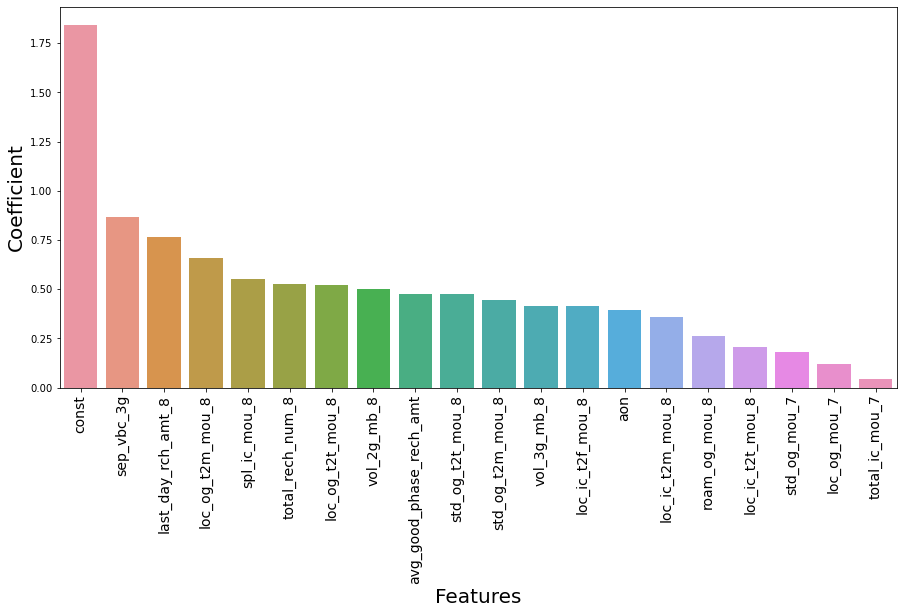

In [276]:
plt.figure(figsize=(15, 7))
sns.barplot(x=weights_df.index, y='Coef', data=weights_df)
plt.xlabel('Features', size=20)
plt.ylabel('Coefficient', size=20)
plt.xticks(size = 14, rotation='vertical')
plt.show()

- ### Top Predictor Variables are 

    - `sep_vbc_3g` with -0.86 coef value
    - `last_day_rch_amt_8` with - 0.77  coef value
    - `loc_og_t2m_mou_8`	with	-0.66  coef value
    - `spl_ic_mou_8`	with	-0.55 coef value
    - `total_rech_num_8`	with	-0.52 coef value
    - `loc_og_t2t_mou_8`	with	-0.52 coef value
    - `vol_2g_mb_8	with`	-0.50 coef value
    - `avg_good_phase_rech_amt`	with	0.48 coef value
    - `std_og_t2t_mou_8`	with	-0.47 coef value
    - `std_og_t2m_mou_8`	with	-0.45 coef value
    - `vol_3g_mb_8`	with	-0.42 coef value
    - `loc_ic_t2f_mou_8`	with	-0.41 coef value
    - `aon`	with	-0.39 coef value
    - `loc_ic_t2m_mou_8`	with	-0.36 coef value
    - `roam_og_mou_8`	with	0.26 coef value
    - `loc_ic_t2t_mou_8`	with	-0.21 coef value
    - `std_og_mou_7`	with	0.18 coef value
    - `loc_og_mou_7`	with	0.12 coef value

## Recommendations 

on Performing the various model building on the PCA Dataset  SVM model is performing better than Random FOrest , Random Forest Performs better than Logistic Regression 

### SVM

   - ```Recall/Sensitivity``` on the train data after deciding the cutoff : 95.18%

   - ```Accuracy``` on the train data after deciding the cutoff: 88.26%
   
   - ```AUC SCORE``` on the train data after deciding the cutoff: 95.17%
   
   - ```Recall/Sensitivity``` on the test data after deciding the cutoff : 88.187%

   - ```Accuracy``` on the test data after deciding the cutoff: 81.59%
   
   - ```AUC SCORE``` on the train data after deciding the cutoff: 91.44%

### Random Forest
   - ```Recall/Sensitivity``` on the train data after deciding the cutoff : 93.07%

   - ```Accuracy``` on the train data after deciding the cutoff: 86.84%
   - ```ROC SCORE``` on the train data after deciding the cutoff: 94.65%
   
   - ```Recall/Sensitivity``` on the test data after deciding the cutoff : 85.32%

   - ```Accuracy``` on the test data after deciding the cutoff: 79.59%
   - ```ROC SCORE``` on the train data after deciding the cutoff: 89.19%

### Logistic Regression
   - ```Recall/Sensitivity``` on the train data after deciding the cutoff : 89.71%

   - ```Accuracy``` on the train data after deciding the cutoff: 83.99%
   - ``` ROC SCORE``` on the train data after deciding the cutoff: 91.59%
   
   - ```Recall/Sensitivity``` on the test data after deciding the cutoff : 86.79%

   - ```Accuracy``` on the test data after deciding the cutoff: 79.46%
   - ```ROC SCORE``` on the train data after deciding the cutoff: 90.88%